### Importing the data for analysis:

In [2]:
import pandas as pd

df = pd.df = pd.read_csv("loan_payments.csv")

### Task 1 - Convert columns to correct format:

In [3]:
from transform_data import DataTransform

transformer = DataTransform(df)
transformer.timedelta_cols()
transformer.datetime_cols()
transformer.categorical_cols()
transformer.get_dataframe()

modified_df = transformer.get_dataframe()

print(modified_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   id                           54231 non-null  int64          
 1   member_id                    54231 non-null  int64          
 2   loan_amount                  54231 non-null  int64          
 3   funded_amount                51224 non-null  float64        
 4   funded_amount_inv            54231 non-null  float64        
 5   term                         49459 non-null  object         
 6   int_rate                     49062 non-null  float64        
 7   instalment                   54231 non-null  float64        
 8   grade                        54231 non-null  category       
 9   sub_grade                    54231 non-null  object         
 10  employment_length            52113 non-null  object         
 11  home_ownership              

c:\Users\torig\Project_2\Customer_loans_in_finance\transform_data.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
c:\Users\torig\Project_2\Customer_loans_in_finance\transform_data.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
c:\Users\torig\Project_2\Customer_loans_in_finance\transform_data.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
c:\Users\torig\Project_2\Customer_loans_in_finance\transform_data.py:31: UserWarning: Could

### Task 2 - Describing the data as it stands once Dtype have been updated:

In [4]:
from transform_data import DataFrameInfo

describing = DataFrameInfo(modified_df)
describing.describe()
describing.statistical_values()
describing.distinct_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   id                           54231 non-null  int64          
 1   member_id                    54231 non-null  int64          
 2   loan_amount                  54231 non-null  int64          
 3   funded_amount                51224 non-null  float64        
 4   funded_amount_inv            54231 non-null  float64        
 5   term                         49459 non-null  object         
 6   int_rate                     49062 non-null  float64        
 7   instalment                   54231 non-null  float64        
 8   grade                        54231 non-null  category       
 9   sub_grade                    54231 non-null  object         
 10  employment_length            52113 non-null  object         
 11  home_ownership              

{'term': 2,
 'grade': 7,
 'sub_grade': 35,
 'employment_length': 11,
 'home_ownership': 5,
 'verification_status': 3,
 'loan_status': 9,
 'payment_plan': 2,
 'purpose': 14,
 'application_type': 1}

In [5]:
describing.shape()
describing.null_counts()

 
Total number of rows: 54231
Total number of columns: 43


                             Null Count  Null Percentage
funded_amount                      3007         5.544799
term                               4772         8.799395
int_rate                           5169         9.531449
employment_length                  2118         3.905515
mths_since_last_delinq            31002        57.166565
mths_since_last_record            48050        88.602460
last_payment_date                    73         0.134609
next_payment_date                 32608        60.127971
last_credit_pull_date                 7         0.012908
collections_12_mths_ex_med           51         0.094042
mths_since_last_major_derog       46732        86.172116


### Task 3 - Remove / Impute missing values in the data 

- Reduction of data points from 54231 to 51986 
- Showing the difference in the stats once removed/imputed missing values from the data.

In [6]:
from transform_data import DataFrameTransform

transforming=DataFrameTransform(modified_df)

transforming.null_counts()
transforming.remove_high_null_columns()
transforming.impute_columns_with_median()
transforming.impute_columns_with_mode()
transforming.remove_rows_with_missing_data()
updated_df = transforming.get_updated_dataframe()

print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51986 entries, 0 to 54227
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          51986 non-null  int64         
 1   member_id                   51986 non-null  int64         
 2   loan_amount                 51986 non-null  int64         
 3   funded_amount               51986 non-null  float64       
 4   funded_amount_inv           51986 non-null  float64       
 5   term                        51986 non-null  object        
 6   int_rate                    51986 non-null  float64       
 7   instalment                  51986 non-null  float64       
 8   grade                       51986 non-null  category      
 9   sub_grade                   51986 non-null  object        
 10  employment_length           51986 non-null  object        
 11  home_ownership              51986 non-null  category      


In [7]:
describing = DataFrameInfo(updated_df)
describe_new_df = describing.shape()
describe_new_df = describing.null_counts()
print(describe_new_df)



 
Total number of rows: 51986
Total number of columns: 39
No columns with null values found.
None


#### Visualiation of null values before and after transformation:

<Figure size 2000x1200 with 0 Axes>

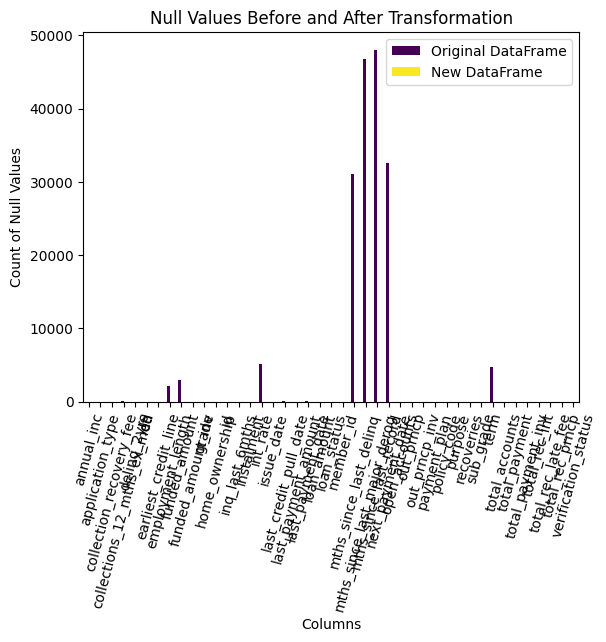

In [8]:
from transform_data import Plotter

plotting = Plotter()
plotting.plot_null_counts(df, updated_df)

#### Saving it down to csv to use in milestone4

In [9]:
updated_df.to_csv('C:/Users/torig/Project_2/Customer_loans_in_finance/updated_dataframe.csv', index=False)

### Task 4 - Perform transformation on skewed columns

Checking we have the right columns to check for the skewness of the data

In [10]:
from scipy.stats import skew

from transform_data import DataFrameInfo
numerical_columns = updated_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
excluded_columns = ['id', 'member_id', 'policy_code']
numerical_columns = [col for col in numerical_columns if col not in excluded_columns]
skew_cols = updated_df[numerical_columns].apply(lambda x: skew(x.dropna()))

print(f'Numerical columns for skewness analysis: {numerical_columns}')

Numerical columns for skewness analysis: ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']


Compute skewness for these columns:

In [11]:
from scipy.stats import skew
from transform_data import DataFrameTransform

fixing = DataFrameTransform(updated_df)
skewed_data = fixing.identify_skewed_columns(updated_df, numerical_columns)


Highly skewed cols: ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']
Moderatley skewed cols: ['open_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp']
Acceptable skewed cols: ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'dti', 'total_accounts']


Using the universal threshold to start (> 1) the drilling down into more details: 

In [12]:
universal_threshold = 1
flagged_columns = skew_cols [abs(skew_cols)>universal_threshold]
print(flagged_columns)

annual_inc                     8.790730
delinq_2yrs                    5.275585
inq_last_6mths                 3.279564
open_accounts                  1.058459
out_prncp                      2.354968
out_prncp_inv                  2.355409
total_payment                  1.258528
total_payment_inv              1.247212
total_rec_prncp                1.249398
total_rec_int                  2.193242
total_rec_late_fee            13.263072
recoveries                    13.895454
collection_recovery_fee       27.667418
last_payment_amount            2.475458
collections_12_mths_ex_med    20.423664
dtype: float64


 we will determine if the skewness is problematic based on data type, context of the variable and impact on analysis (for example heavily skewed predictor variables can distort regression)

- For discrete columns (delinq_2yrs & inq_last_6mnths) consider higher thresholds since skewness is expected

- For continious financial columns(loan_amount, recoveries) aim for skewness <1 after transformation.

With the info above: 

**Highly Skewed i.e. > 2: Needs transformation:**
- annual_inc
- out_prncp 
- out_prncp_inv
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_payment_amount

**Highly Skewed: Discrete Data so acceptable:**
- delinq_2yrs
- inq_last_6mths
- collections_12_mths_ex_med

**Moderately Skewed: (1.2-1.3):**
- total_payment
- total_payment_inv 
- total_rec_prncp

**Close to threshold: May benefit from transformation**
- open_accounts 


Putting this into code: 

In [13]:
fixing.identify_skewed_columns(updated_df, numerical_columns)

Highly skewed cols: ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']
Moderatley skewed cols: ['open_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp']
Acceptable skewed cols: ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'dti', 'total_accounts']


(['annual_inc',
  'delinq_2yrs',
  'inq_last_6mths',
  'out_prncp',
  'out_prncp_inv',
  'total_rec_int',
  'total_rec_late_fee',
  'recoveries',
  'collection_recovery_fee',
  'last_payment_amount',
  'collections_12_mths_ex_med'],
 ['open_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp'],
 ['loan_amount',
  'funded_amount',
  'funded_amount_inv',
  'int_rate',
  'instalment',
  'dti',
  'total_accounts'])

In [14]:
transformed_df = fixing.transform_data_based_on_skewness(updated_df, numerical_columns)

Highly skewed cols: ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']
Moderatley skewed cols: ['open_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp']
Acceptable skewed cols: ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'dti', 'total_accounts']
Applying log transformation to: annual_inc
Applying log transformation to: delinq_2yrs
Applying log transformation to: inq_last_6mths
Applying log transformation to: out_prncp
Applying log transformation to: out_prncp_inv
Applying log transformation to: total_rec_int
Applying log transformation to: total_rec_late_fee
Applying log transformation to: recoveries
Applying log transformation to: collection_recovery_fee
Applying log transformation to: last_payment_amount
Applying log transformation to: collections_12_mths_ex_med
Applying squ

Showing that after fixing with the above changes that all the moderately skewed cols are now acceptable. The remaining skewed columns: 

**Highly skewed cols:**
- delinq_2yrs [discrete data so acceptable to be higher]
- total_rec_late_fee, 
- recoveries, 
- collection_recovery_fee, 
- collections_12_mths_ex_med [discrete data so acceptable to be higher]


In [15]:
highly_skewed_columns, moderately_skewed_columns, acceptable_skewed_columns = fixing.identify_skewed_columns(transformed_df, numerical_columns)
print(highly_skewed_columns)


Highly skewed cols: ['delinq_2yrs', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
Moderatley skewed cols: []
Acceptable skewed cols: ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']
['delinq_2yrs', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']


In [16]:
new_skew_values = transformed_df[numerical_columns].apply(lambda x: skew(x.dropna()))
print(new_skew_values)

loan_amount                    0.796729
funded_amount                  0.863188
funded_amount_inv              0.805889
int_rate                       0.461611
instalment                     0.988583
annual_inc                     0.196407
dti                            0.194336
delinq_2yrs                    2.548825
inq_last_6mths                 0.699937
open_accounts                  0.301144
total_accounts                 0.778388
out_prncp                      0.593736
out_prncp_inv                  0.593815
total_payment                  0.382031
total_payment_inv              0.298528
total_rec_prncp                0.379525
total_rec_int                 -0.553563
total_rec_late_fee             5.494509
recoveries                     3.815941
collection_recovery_fee        5.295740
last_payment_amount            0.183769
collections_12_mths_ex_med    17.105895
dtype: float64


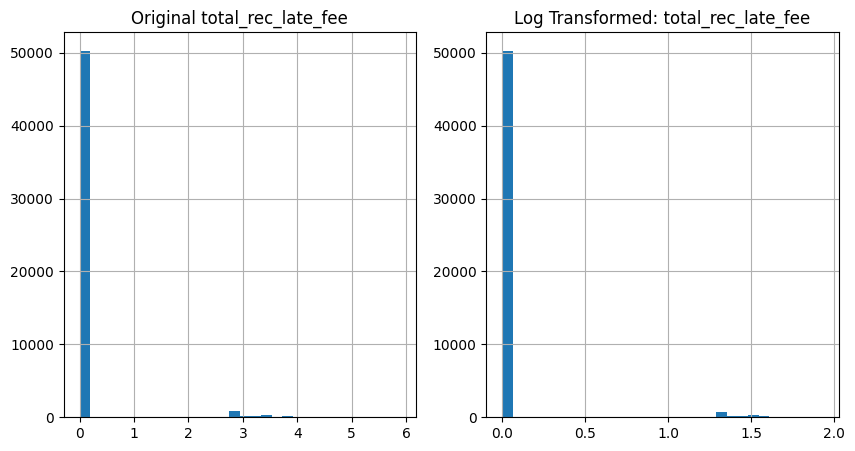

In [17]:
visualize = Plotter()
high_skewed_plot = visualize.visualising_column_distribution(updated_df, transformed_df,"total_rec_late_fee")

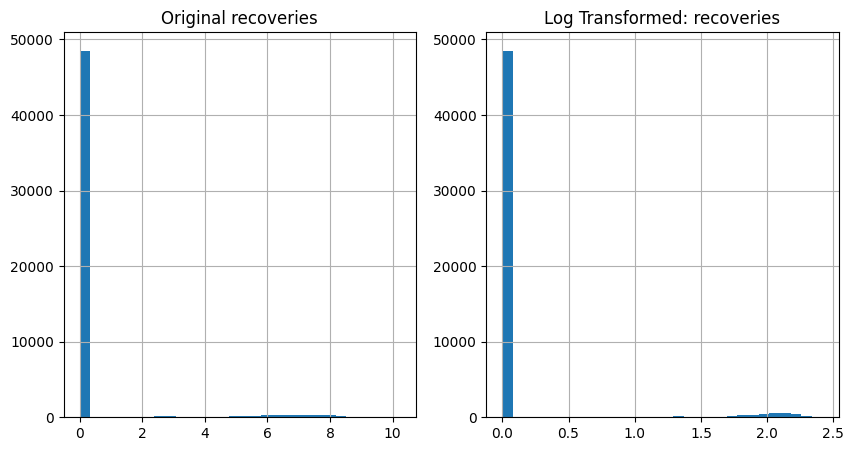

In [18]:
visualize = Plotter()
high_skewed_plot = visualize.visualising_column_distribution(updated_df, transformed_df,"recoveries")

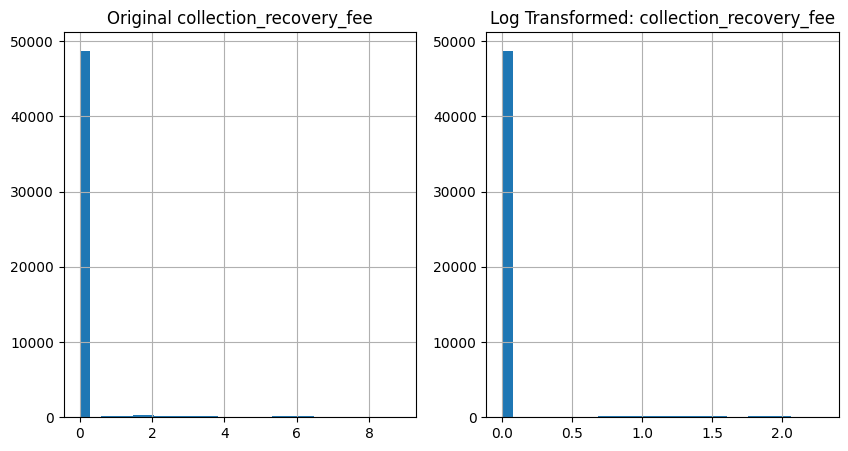

In [19]:
visualize = Plotter()
high_skewed_plot = visualize.visualising_column_distribution(updated_df, transformed_df,"collection_recovery_fee")

### Task 5 - Remove outliers from the data:

Start again from here down:



In [20]:
transformed_df.describe()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,issue_date,dti,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code
count,5.198600e+04,5.198600e+04,51986.000000,51986.000000,51986.000000,51986.000000,51986.000000,51986.000000,51986,51986.000000,...,51986.000000,51986.000000,51986.000000,51986.000000,51986.000000,51986,51986.000000,51986,51986.000000,51986.0
mean,7.547886e+06,8.572476e+06,13437.189820,13257.943966,13050.272384,13.482907,402.808056,11.054219,2018-09-11 12:30:49.790328320,15.828803,...,91.096468,7.411539,0.104623,0.419780,0.204193,2020-08-17 13:29:51.482322432,6.784666,2021-04-14 17:55:58.181048832,0.002786,1.0
min,5.552100e+04,7.472400e+04,500.000000,500.000000,0.000000,5.420000,15.670000,8.101981,2013-08-01 00:00:00,0.000000,...,0.000000,1.976855,0.000000,0.000000,0.000000,2013-12-01 00:00:00,0.000000,2013-08-01 00:00:00,0.000000,1.0
25%,7.512420e+05,9.491962e+05,7200.000000,7500.000000,6950.000000,10.650000,227.980000,10.714440,2017-05-01 00:00:00,10.190000,...,66.075449,6.805036,0.000000,0.000000,0.000000,2019-11-01 00:00:00,5.687365,2021-02-01 00:00:00,0.000000,1.0
50%,7.080184e+06,8.648362e+06,12000.000000,12000.000000,11500.000000,13.160000,349.650000,11.034970,2019-09-01 00:00:00,15.550000,...,88.319024,7.471013,0.000000,0.000000,0.000000,2021-03-01 00:00:00,6.351863,2022-01-01 00:00:00,0.000000,1.0
75%,8.846226e+06,1.044065e+07,18250.000000,18000.000000,18000.000000,15.880000,530.660000,11.379406,2019-11-01 00:00:00,21.200000,...,113.137085,8.119119,0.000000,0.000000,0.000000,2022-01-01 00:00:00,8.257449,2022-01-01 00:00:00,0.000000,1.0
max,3.867612e+07,4.146185e+07,35000.000000,35000.000000,35000.000000,26.060000,1407.010000,14.528355,2021-01-01 00:00:00,39.910000,...,187.082923,10.046004,5.885215,10.231027,8.854121,2022-01-01 00:00:00,10.494497,2022-01-01 00:00:00,1.609438,1.0
std,9.513012e+06,1.025409e+07,8097.087132,7813.437066,8115.767225,4.178076,239.338026,0.522774,NaN,7.597879,...,34.825915,1.029445,0.577033,1.627241,0.934233,NaN,1.658729,NaN,0.045623,0.0


In [21]:
columns_with_outliers = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']

cleaned_df = fixing.remove_outliers(transformed_df, columns_with_outliers)


Lower bound: -9375.0, Upper bound: 34825.0
Lower bound: -7350.0, Upper bound: 31450.0
Lower bound: -9212.499717625002, Upper bound: 32687.499830575
Lower bound: 3.1850000000000023, Upper bound: 23.064999999999998
Lower bound: -207.0425, Upper bound: 929.5374999999999
Lower bound: 9.732539899366188, Upper bound: 12.3211453405549
Lower bound: -6.310000000000004, Upper bound: 37.690000000000005
Lower bound: -1.0397207708399179, Upper bound: 1.732867951399863
Lower bound: 1.206051364465493, Upper bound: 5.0452512220630865
Lower bound: -7.5, Upper bound: 52.5
Lower bound: -12.044755001740247, Upper bound: 20.074591669567077
Lower bound: -12.043509059125292, Upper bound: 20.072515098542155
Lower bound: 5.773703085202598, Upper bound: 195.04795409979587
Lower bound: 4.091677656254532, Upper bound: 193.71546620965822
Lower bound: 0.594383053179854, Upper bound: 174.91458856974526
Lower bound: 4.937470012467241, Upper bound: 9.827047976819927
Lower bound: 1.8399294853461723, Upper bound: 12.015

In [22]:
new_skew_values =  cleaned_df[numerical_columns].apply(lambda x: skew(x.dropna()))
#old_skew_values = transformed_df[numerical_columns].apply(lambda x: skew(x.dropna()))
#changes = new_skew_values - old_skew_values

print(new_skew_values)

cleaned_df.shape

loan_amount                    0.542945
funded_amount                  0.580007
funded_amount_inv              0.550237
int_rate                       0.193069
instalment                     0.585727
annual_inc                     0.057246
dti                            0.186135
delinq_2yrs                    2.580516
inq_last_6mths                 0.591537
open_accounts                  0.126540
total_accounts                 0.466004
out_prncp                      0.573820
out_prncp_inv                  0.573882
total_payment                  0.210427
total_payment_inv              0.160104
total_rec_prncp                0.223620
total_rec_int                 -0.233543
total_rec_late_fee             5.611390
recoveries                     3.962815
collection_recovery_fee        5.526968
last_payment_amount            0.333070
collections_12_mths_ex_med    18.376270
dtype: float64


(44139, 39)

In [23]:
data_loss_percent = (1 - (len(cleaned_df)/len(transformed_df))) * 100

print(f"Original DataFrame shape: {transformed_df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_df.shape}")
print(f"Percentage of data removed: {data_loss_percent:.2f}%")


Original DataFrame shape: (51986, 39)
Cleaned DataFrame shape: (44139, 39)
Percentage of data removed: 15.09%


Showing the difference in the dataset for all columns:

In [24]:
for col in numerical_columns:
    print(f"\n{col} - before IQR method:")
    print(transformed_df[[col]].describe())

    print(f"\n{col} - after IQR method:")
    print(cleaned_df[[col]].describe())


loan_amount - before IQR method:
        loan_amount
count  51986.000000
mean   13437.189820
std     8097.087132
min      500.000000
25%     7200.000000
50%    12000.000000
75%    18250.000000
max    35000.000000

loan_amount - after IQR method:
        loan_amount
count  44139.000000
mean   12464.755658
std     6687.941372
min      700.000000
25%     7200.000000
50%    11400.000000
75%    17000.000000
max    34475.000000

funded_amount - before IQR method:
       funded_amount
count   51986.000000
mean    13257.943966
std      7813.437066
min       500.000000
25%      7500.000000
50%     12000.000000
75%     18000.000000
max     35000.000000

funded_amount - after IQR method:
       funded_amount
count   44139.000000
mean    12347.138585
std      6441.691611
min       700.000000
25%      7500.000000
50%     12000.000000
75%     16000.000000
max     31450.000000

funded_amount_inv - before IQR method:
       funded_amount_inv
count       51986.000000
mean        13050.272384
std      

visualising these differences:

c:\Users\torig\Project_2\Customer_loans_in_finance\transform_data.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 10))


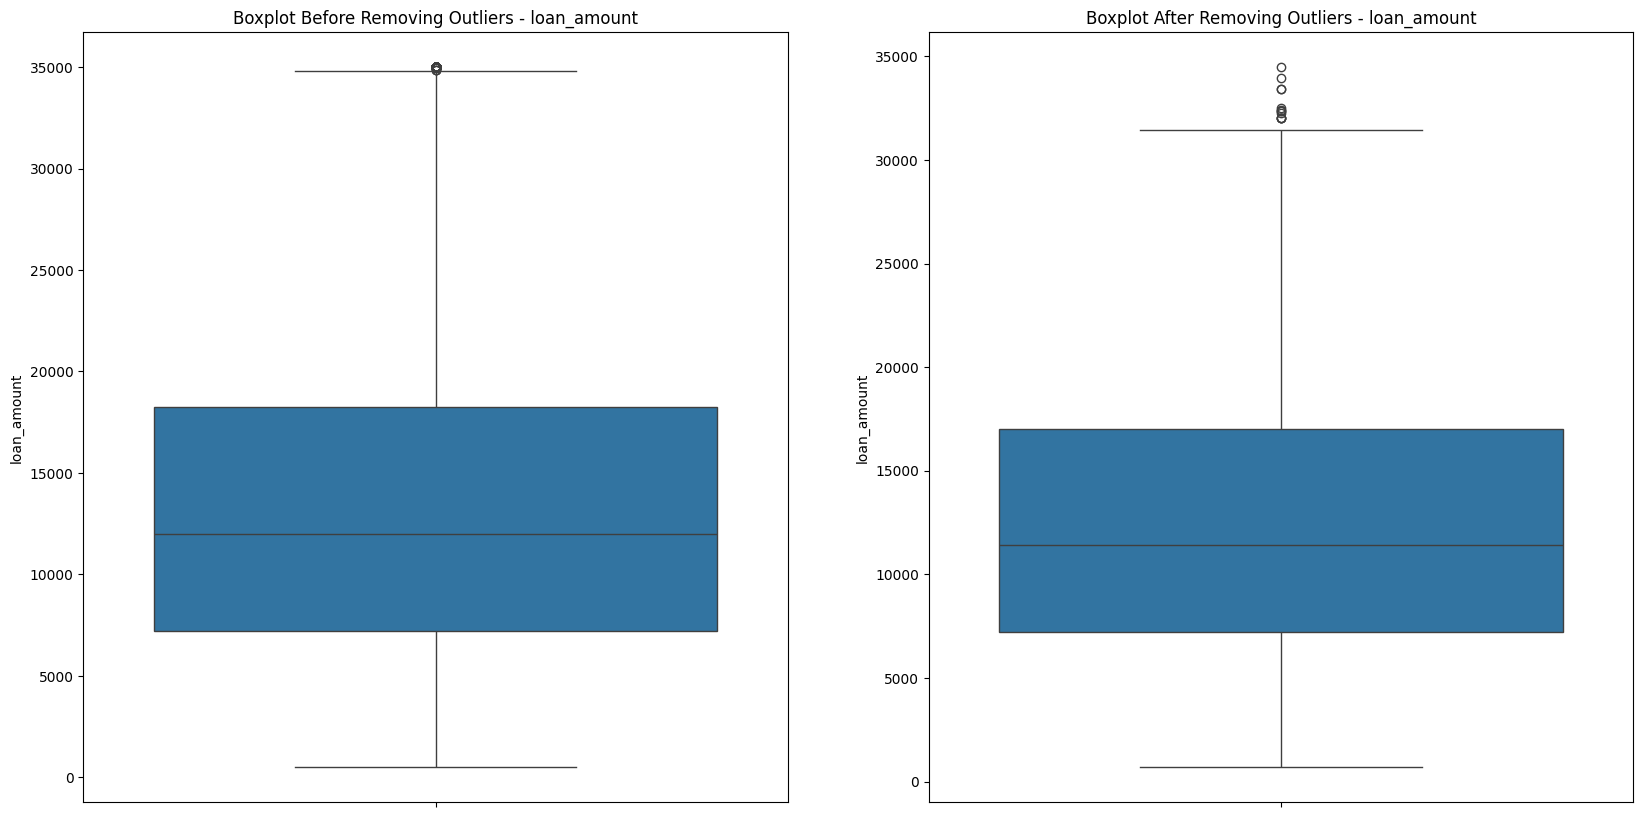

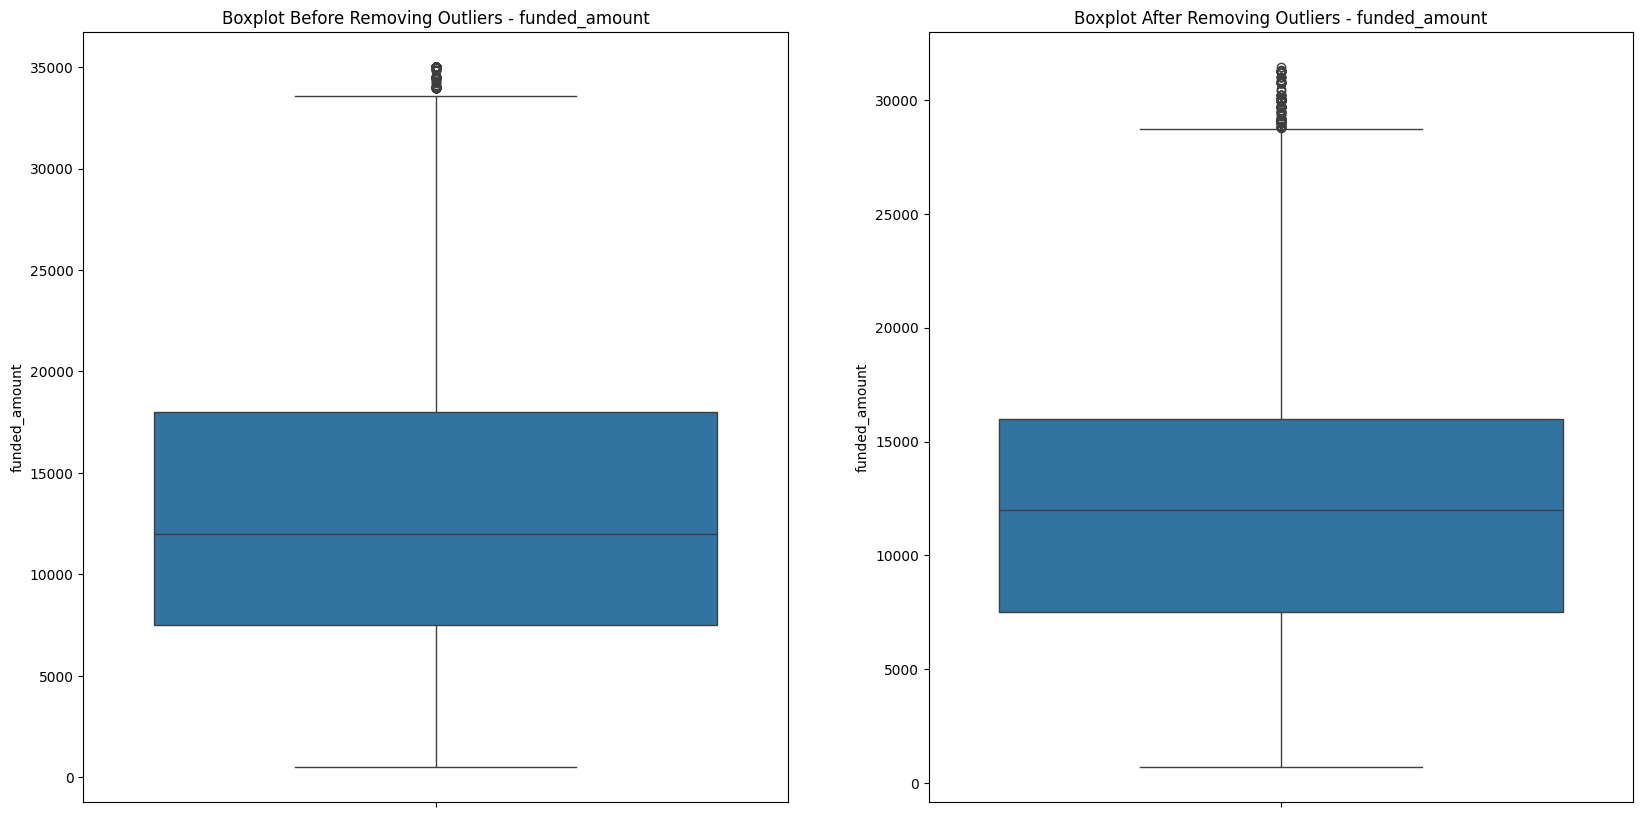

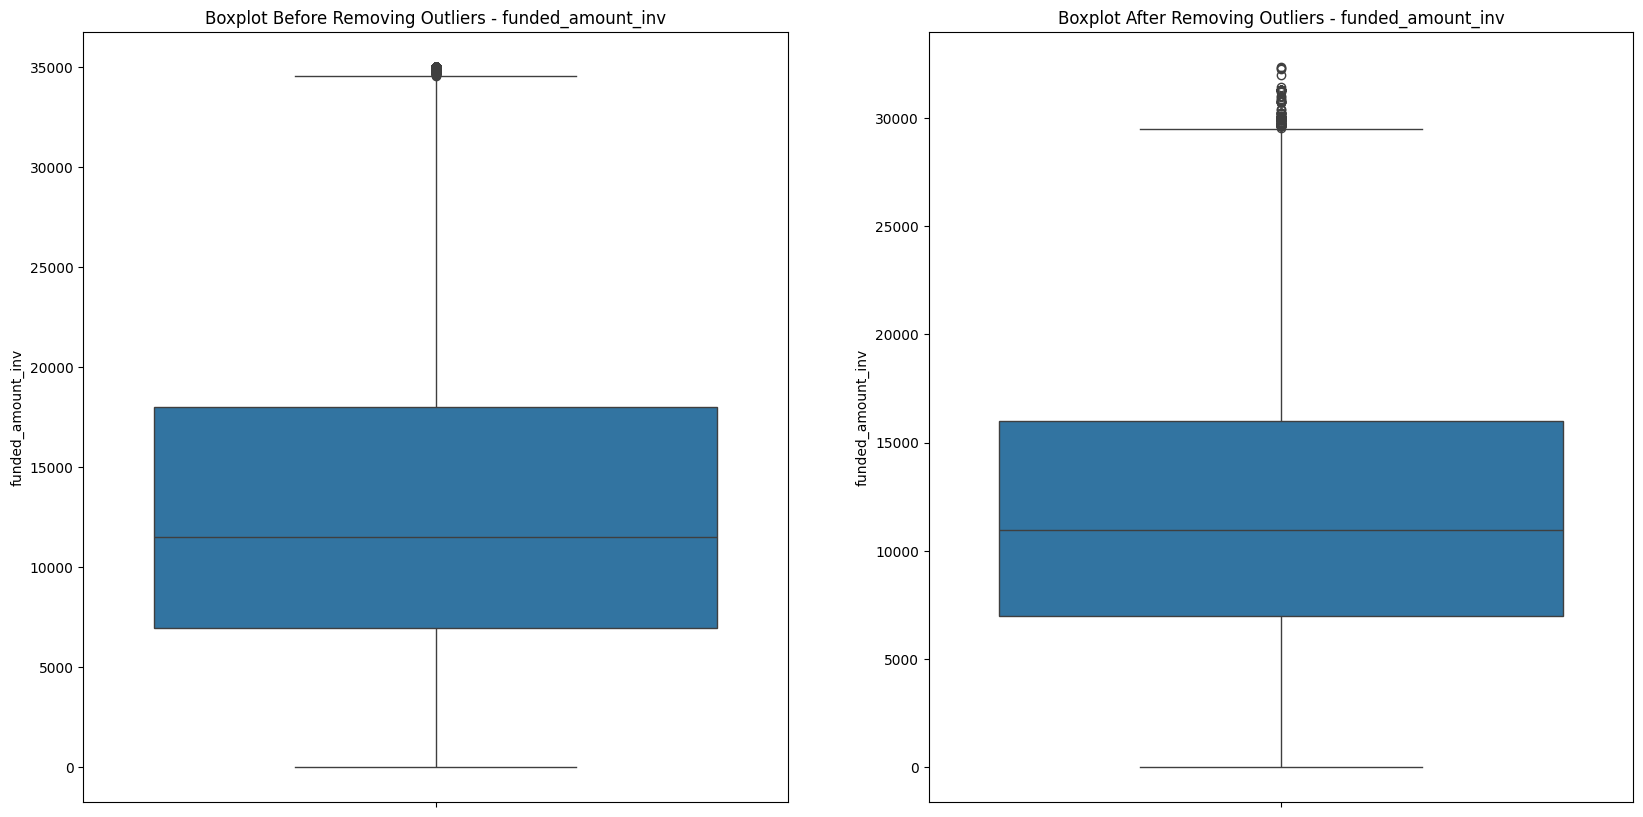

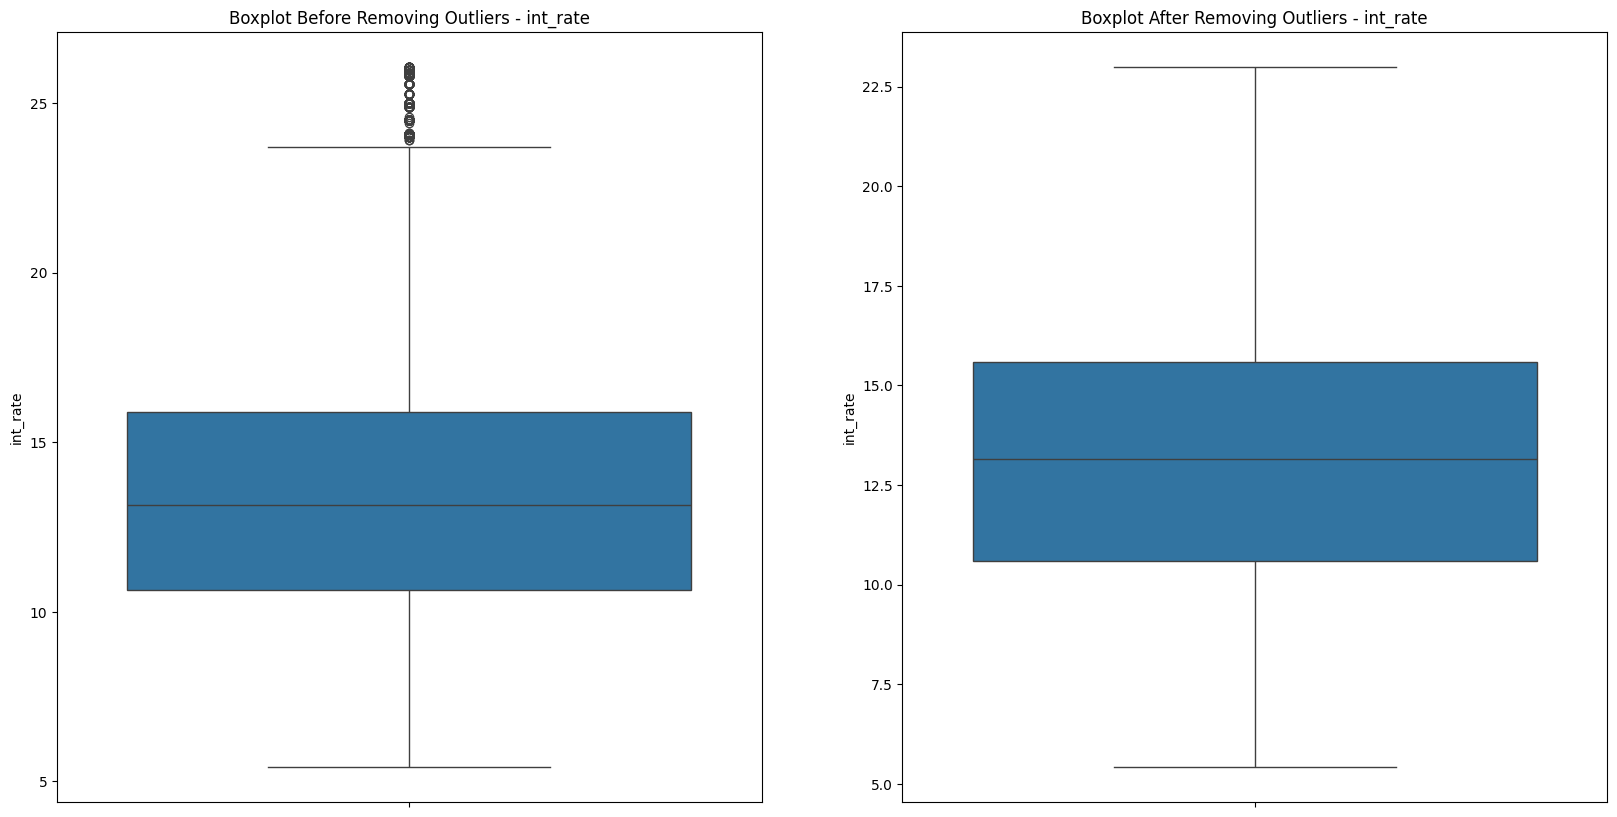

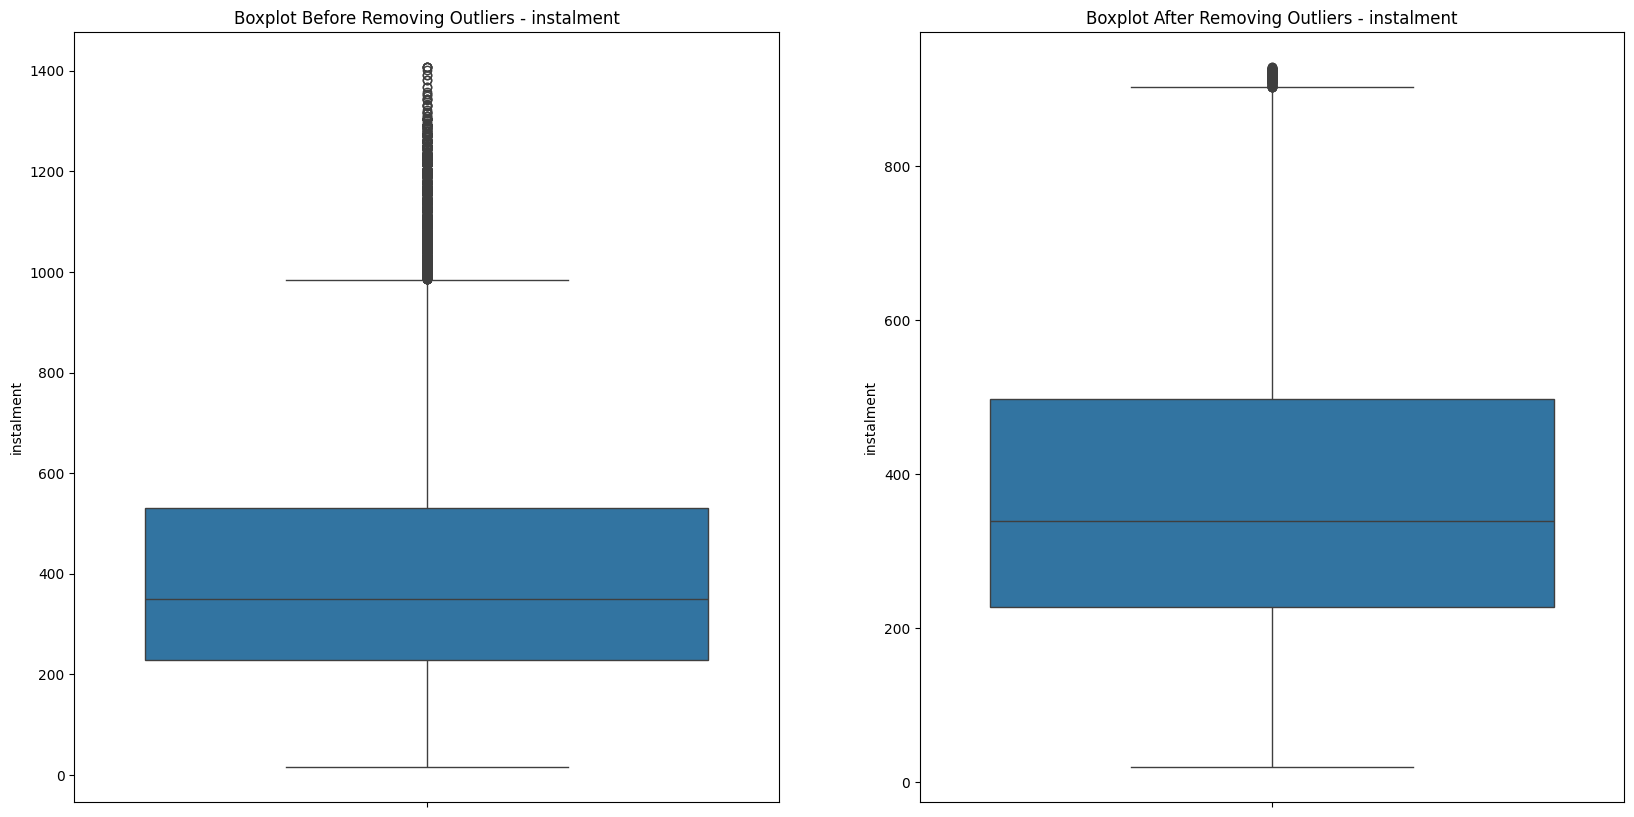

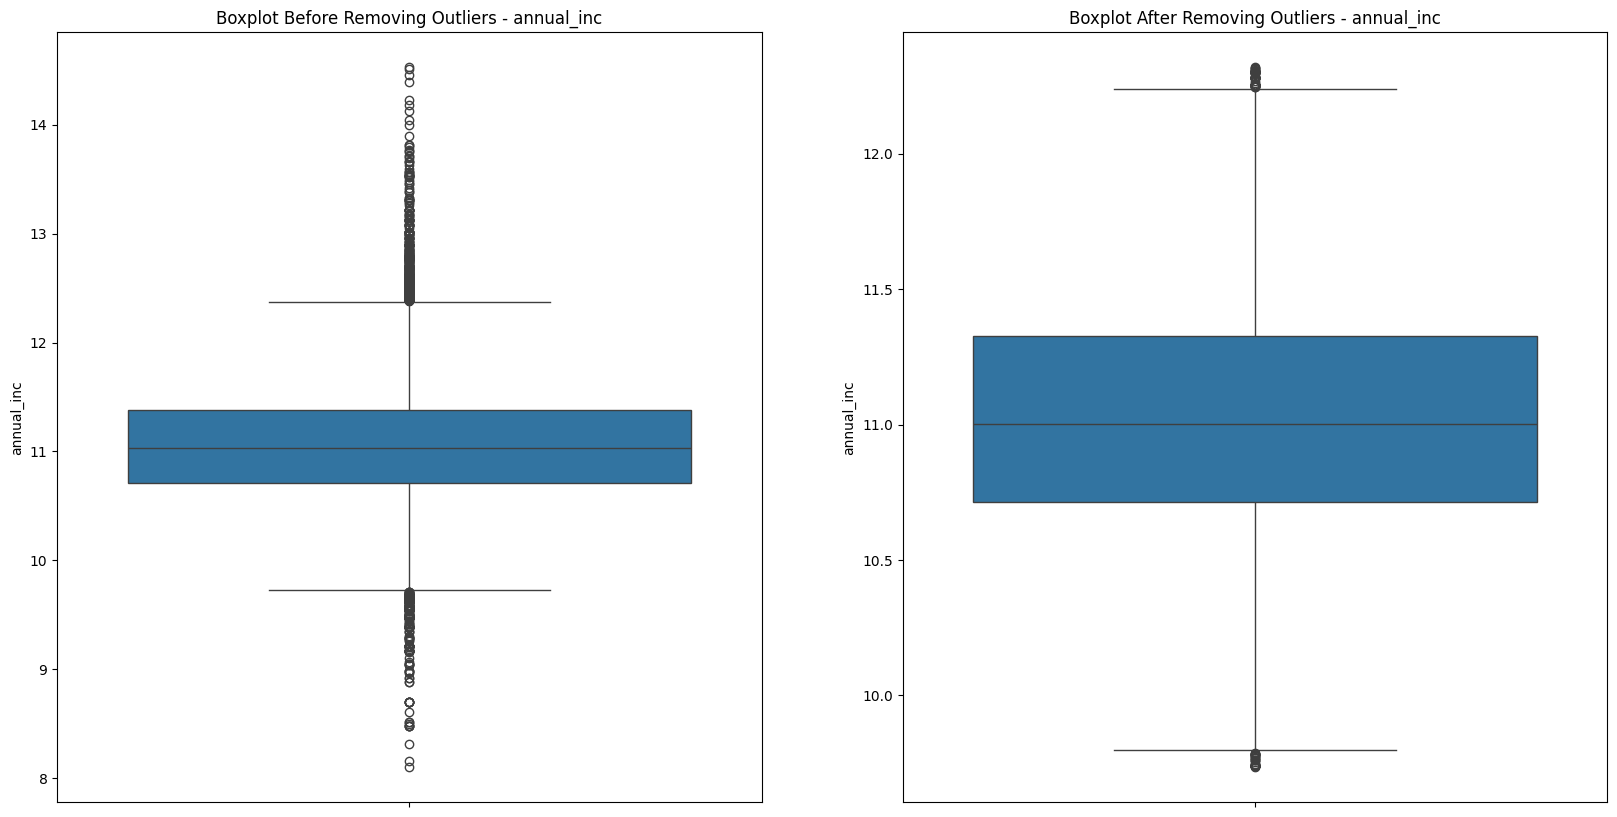

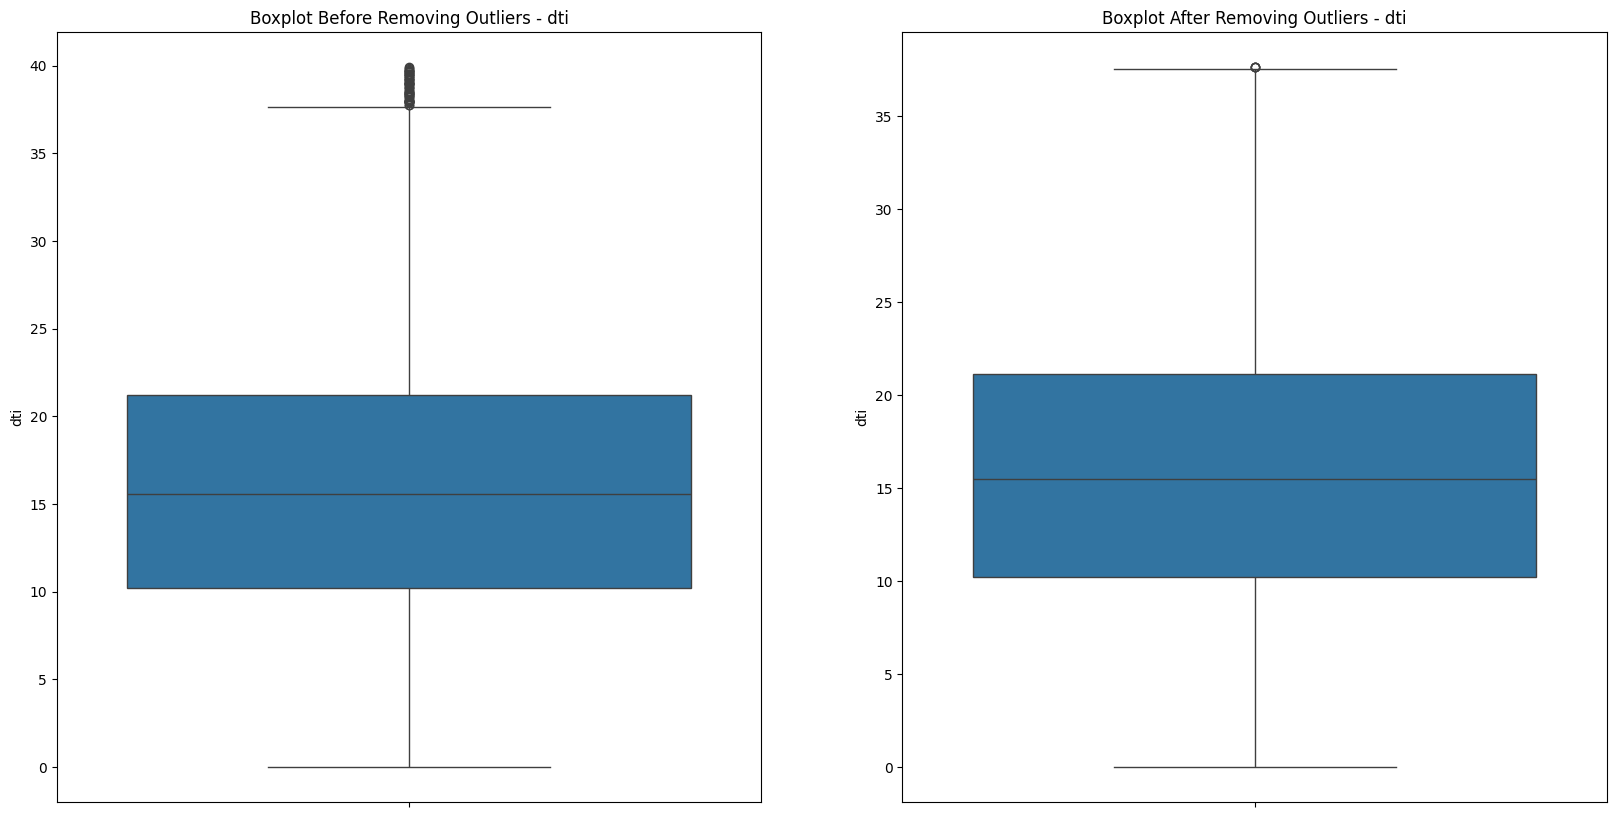

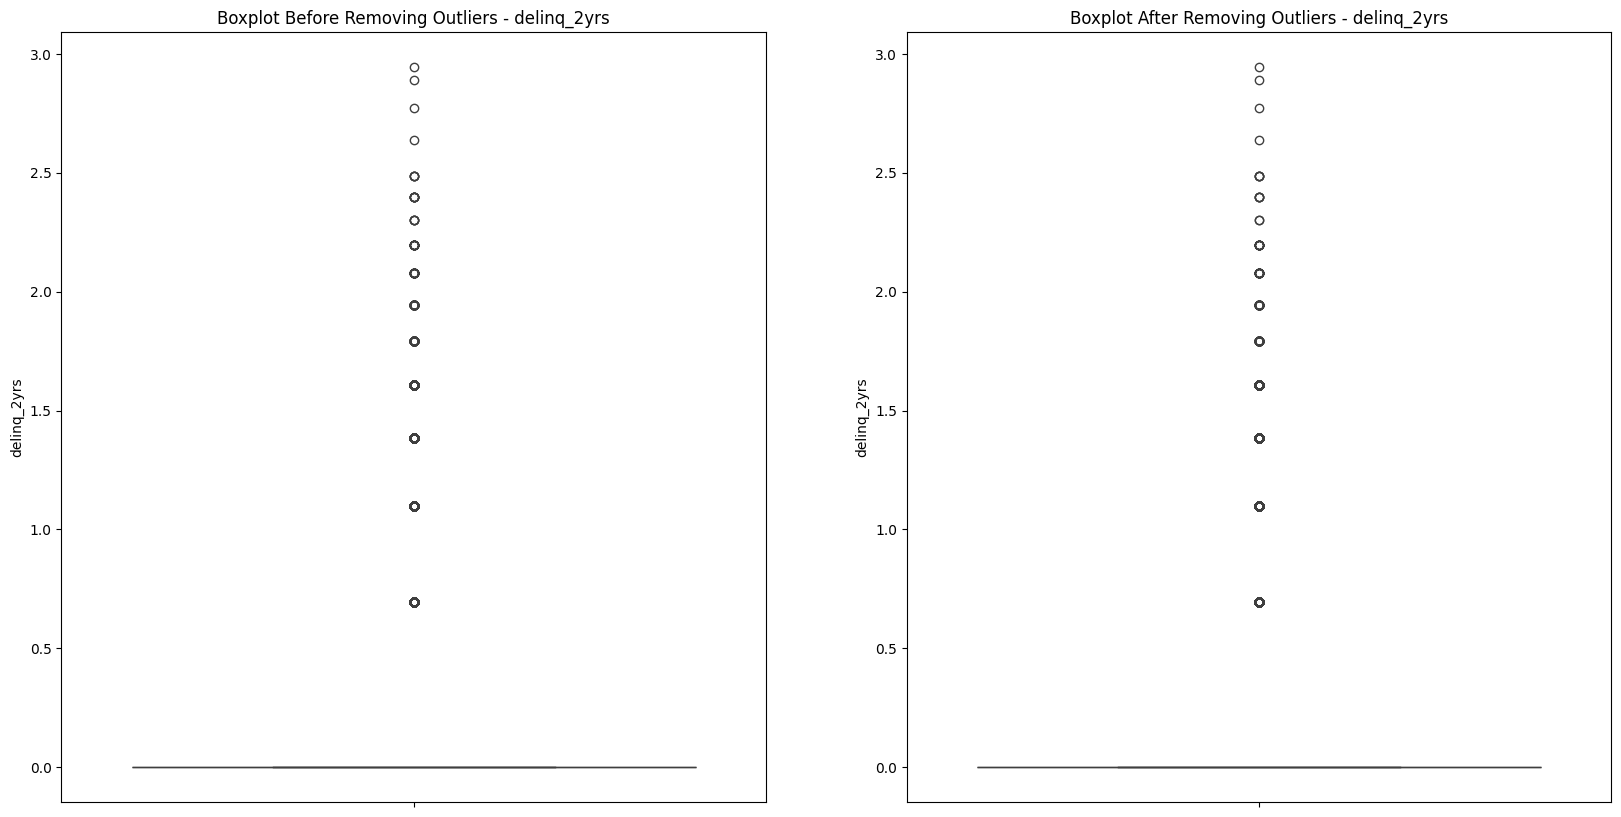

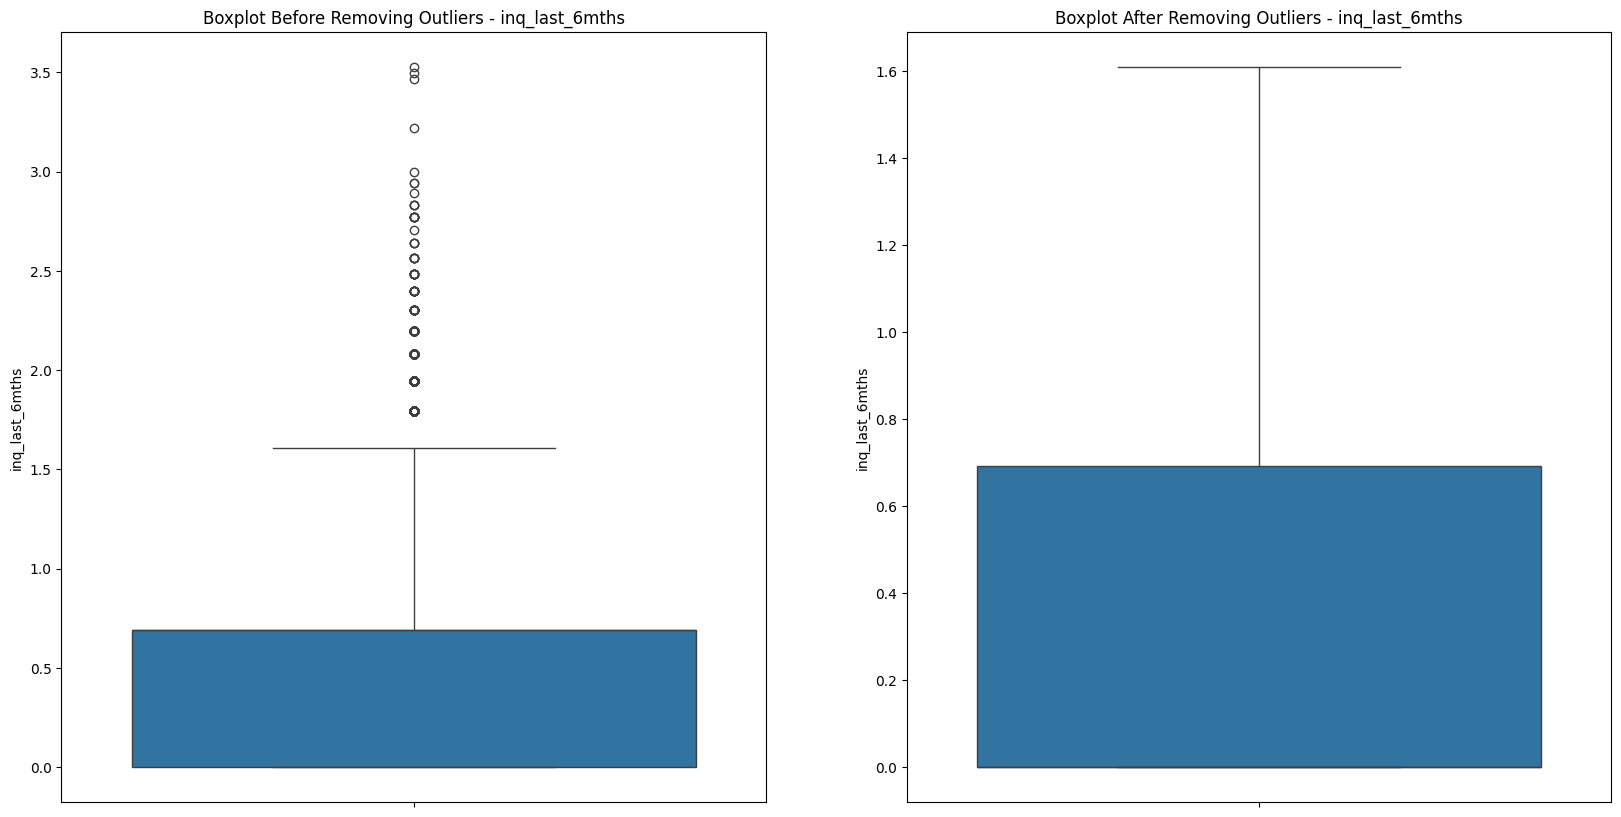

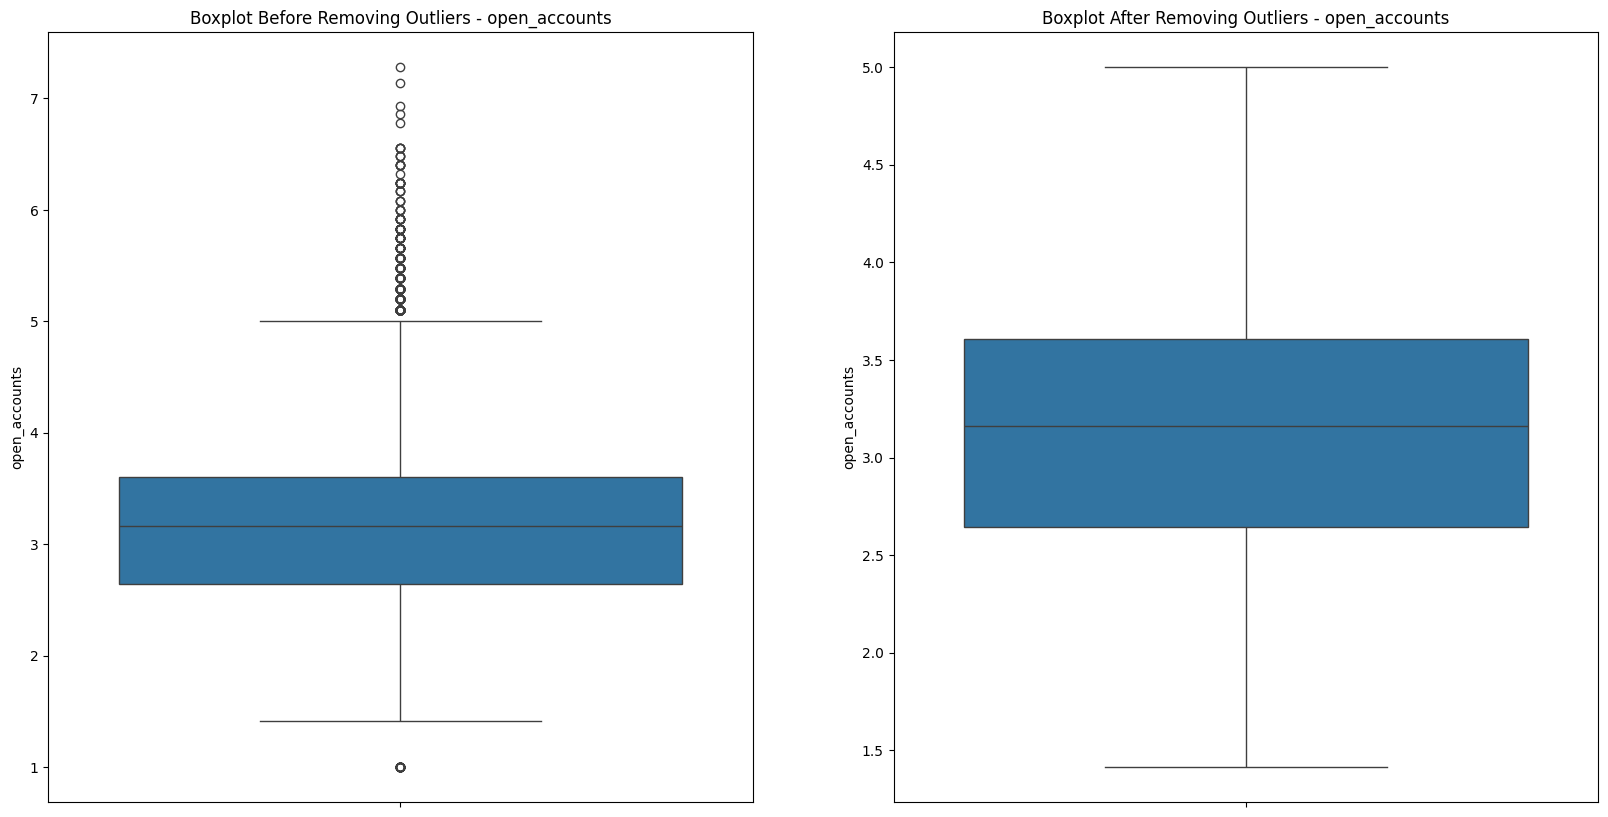

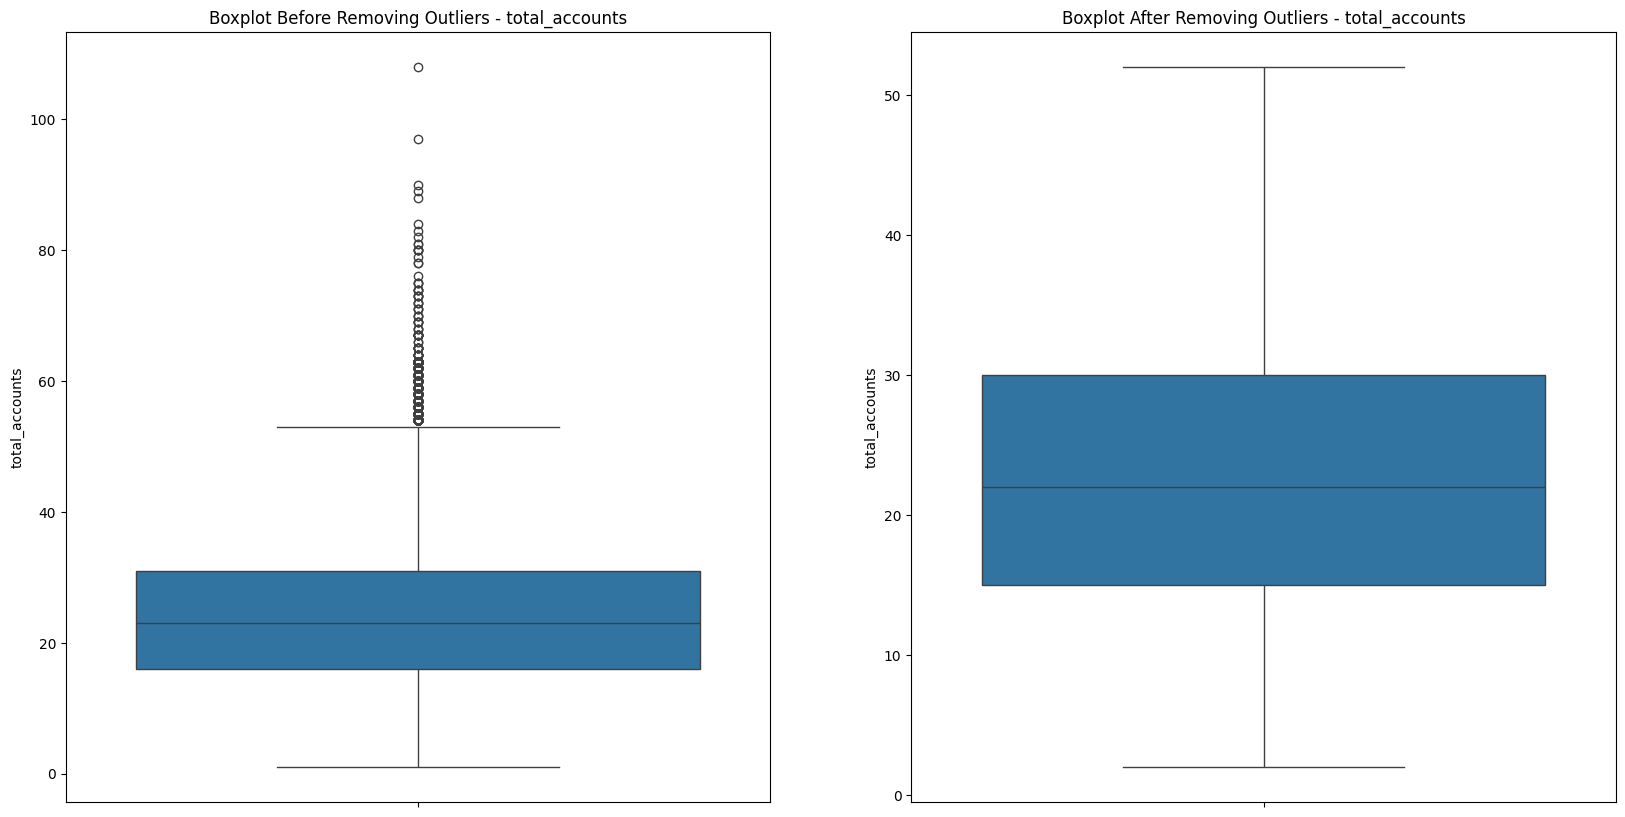

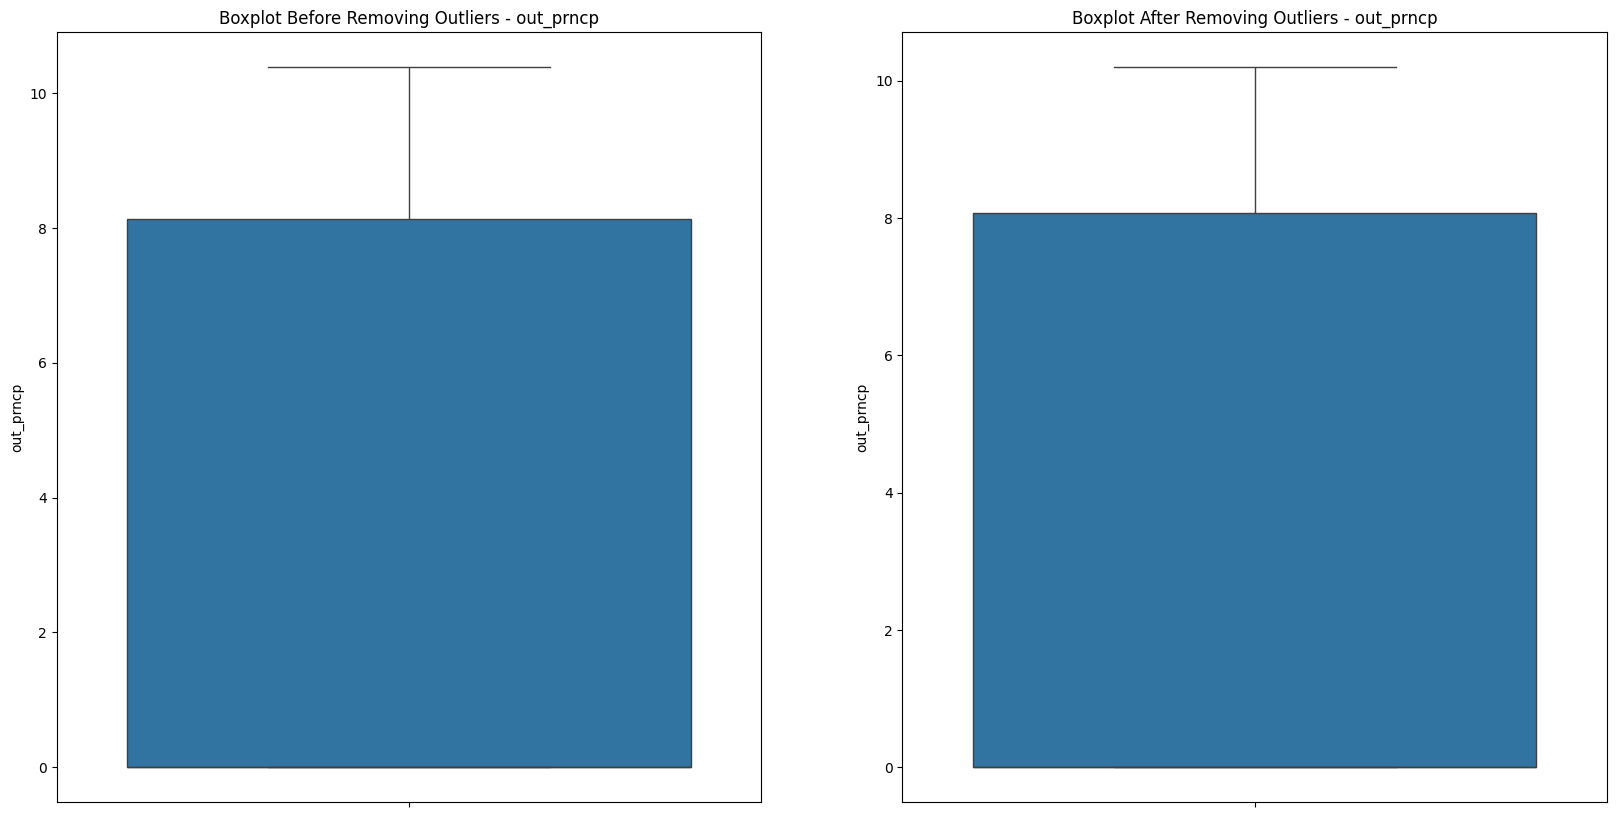

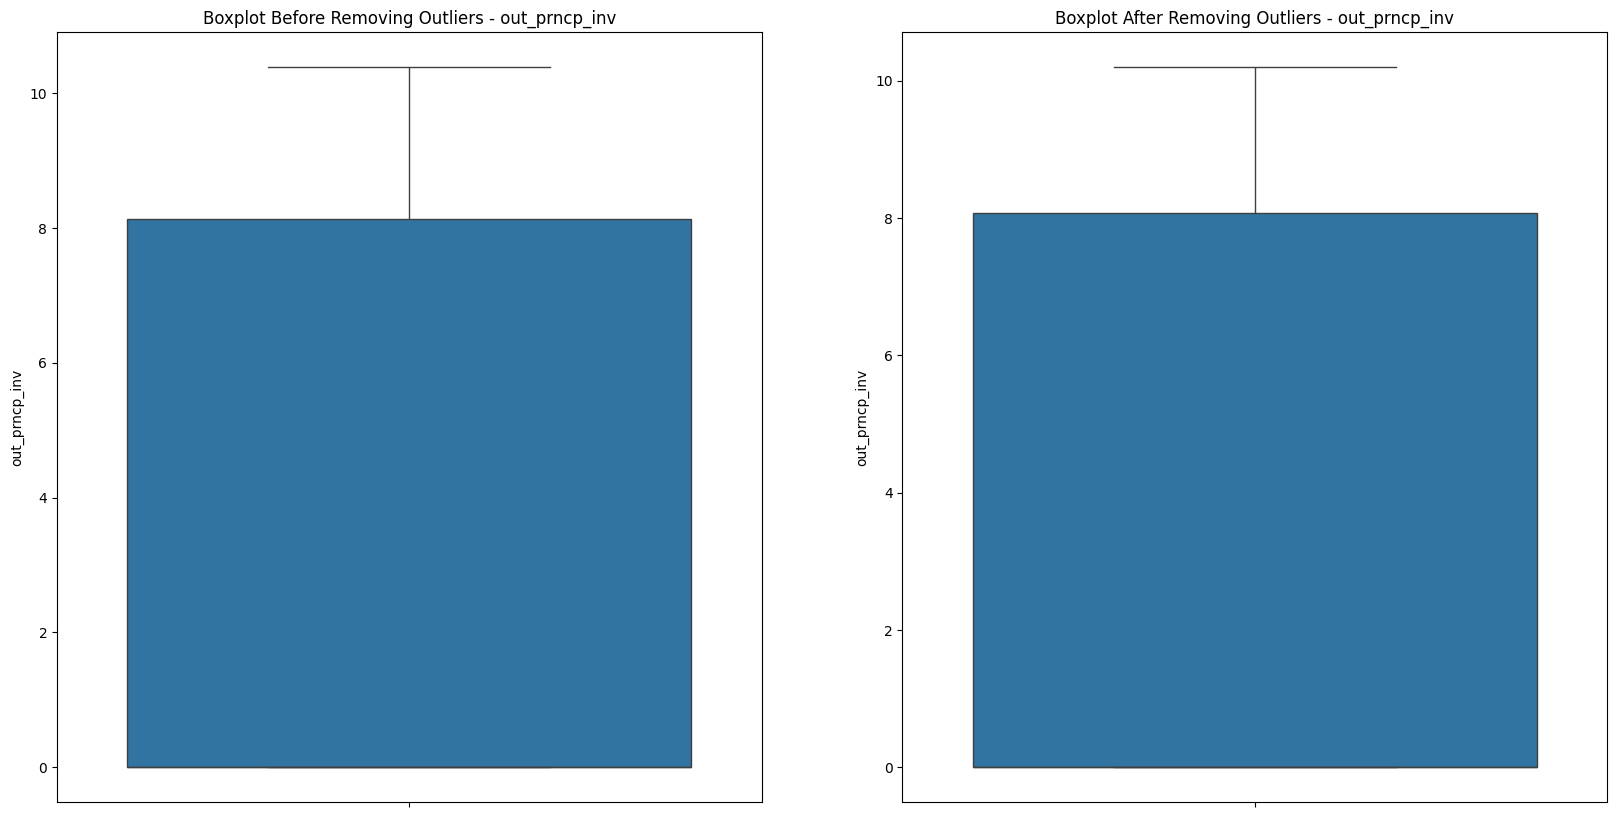

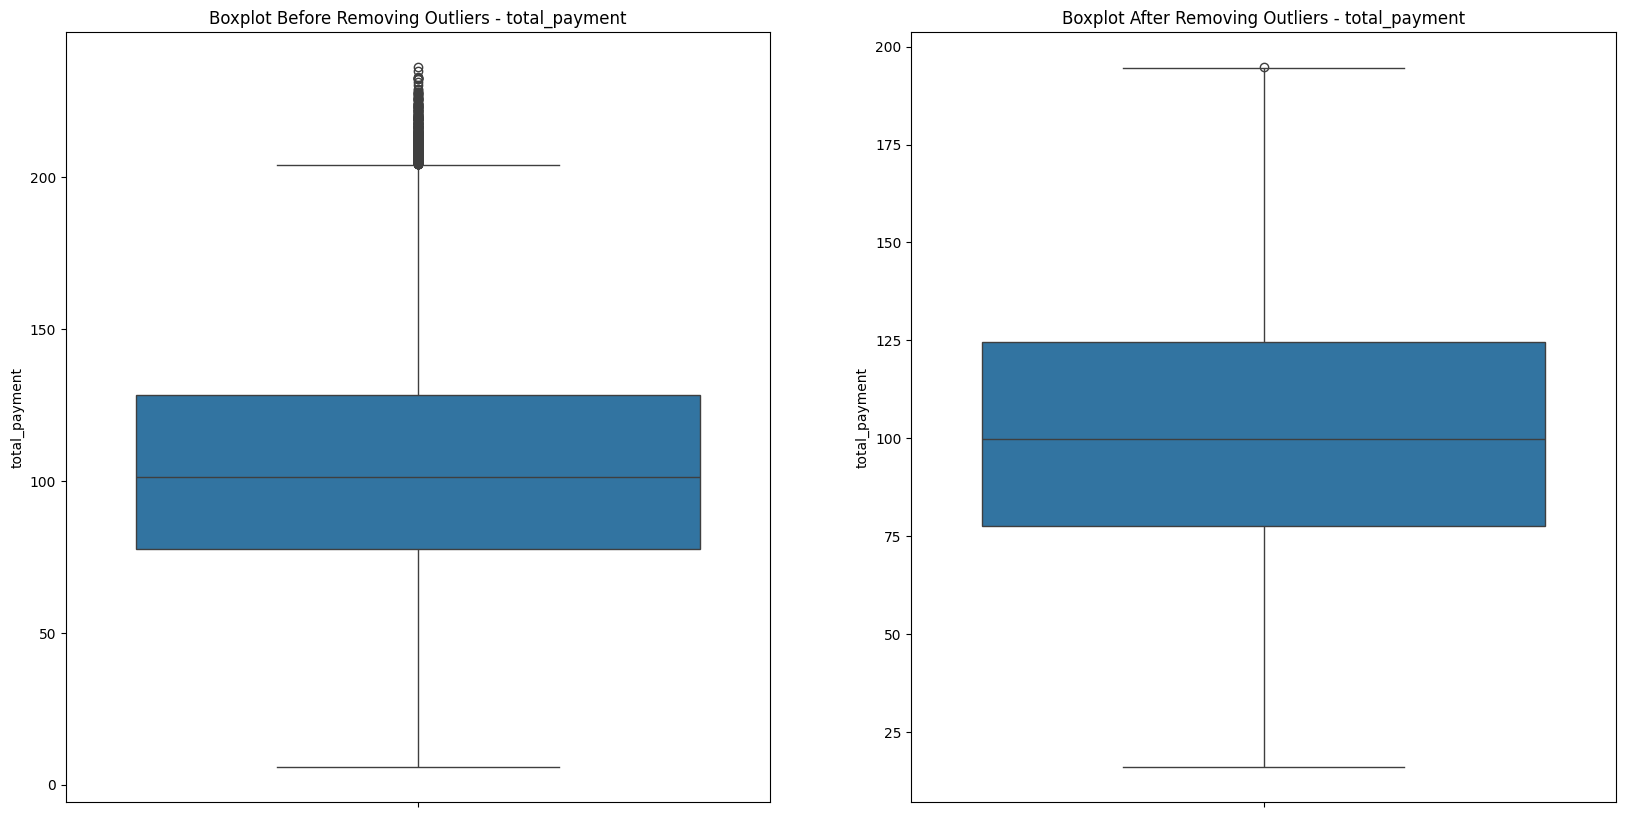

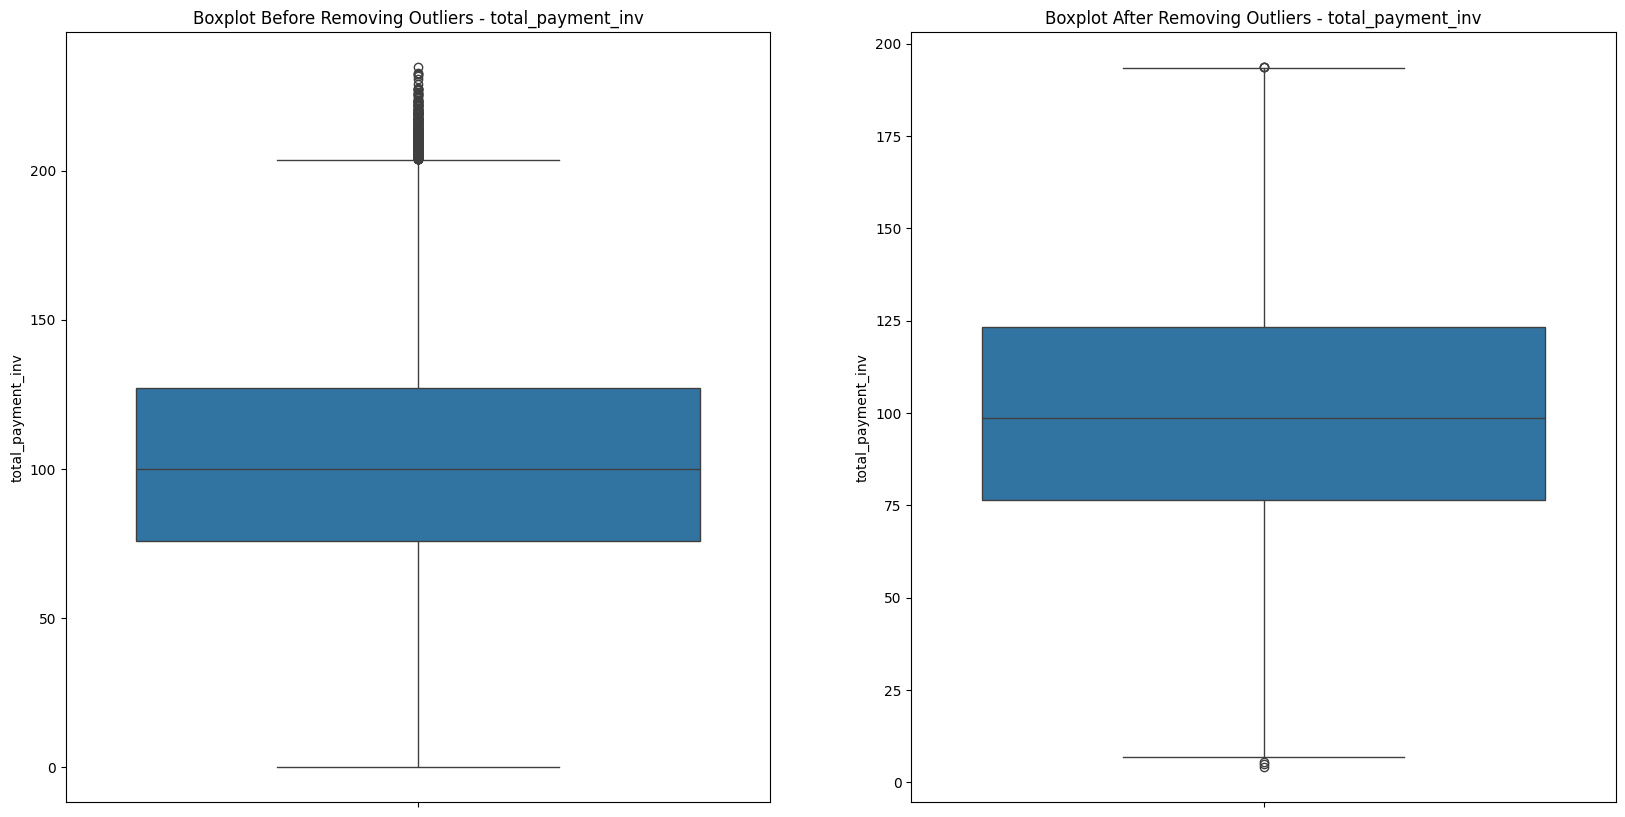

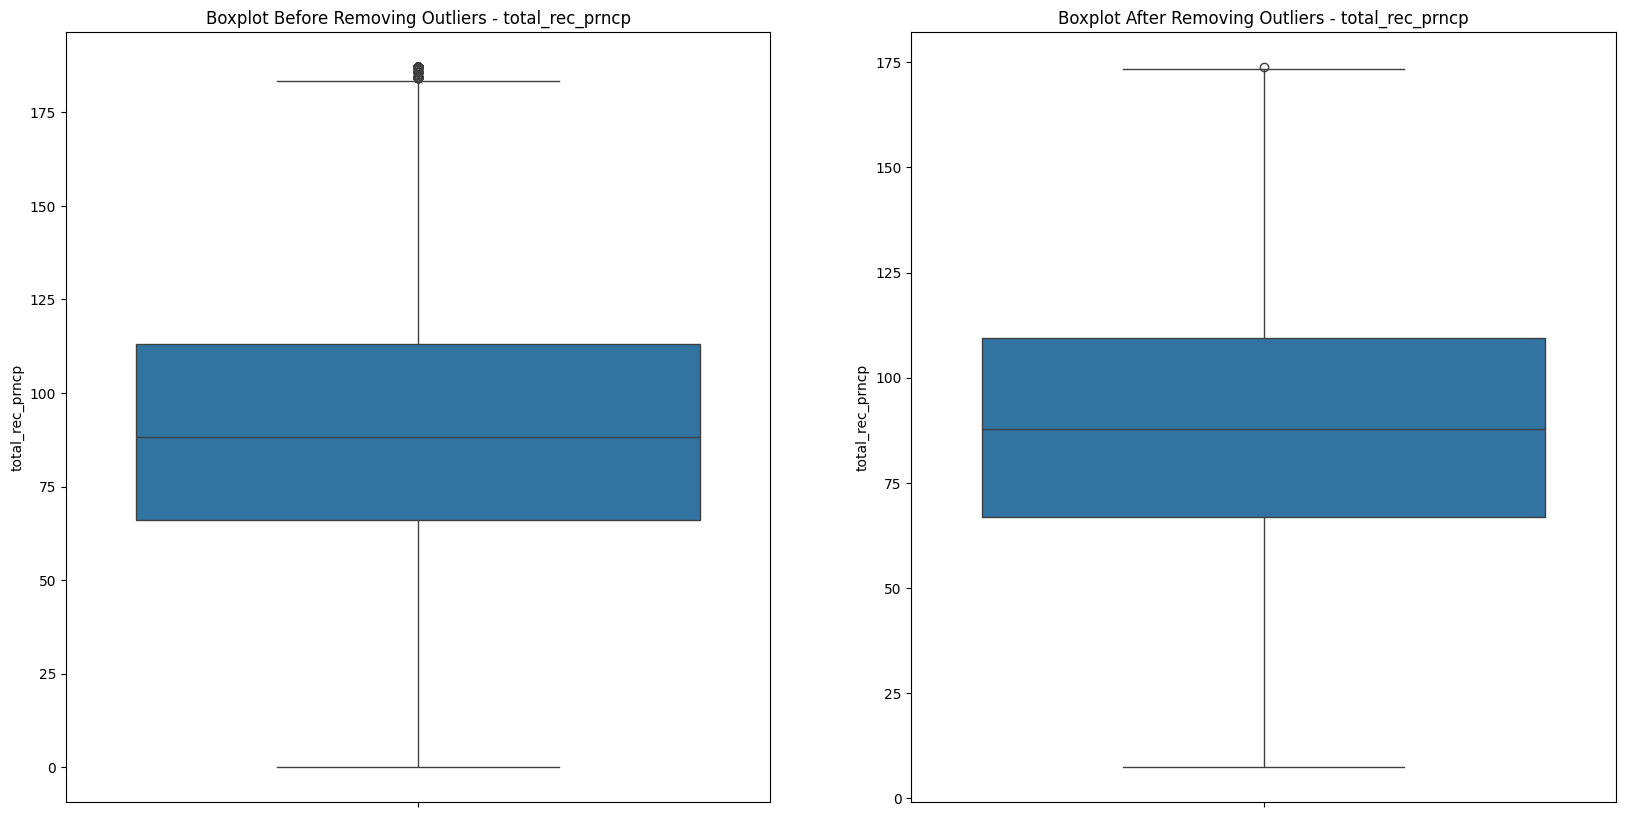

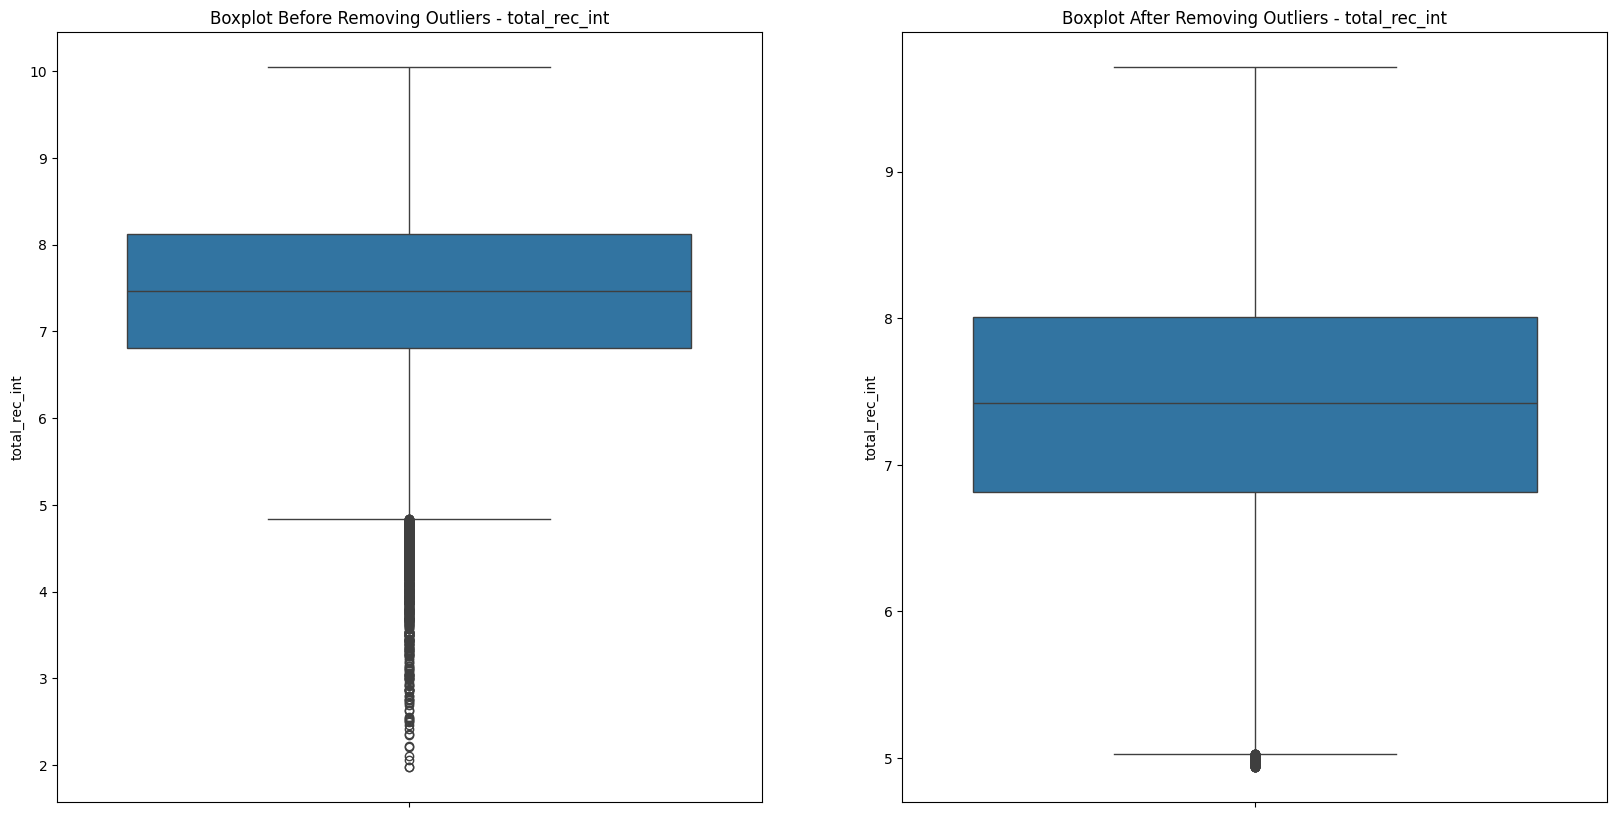

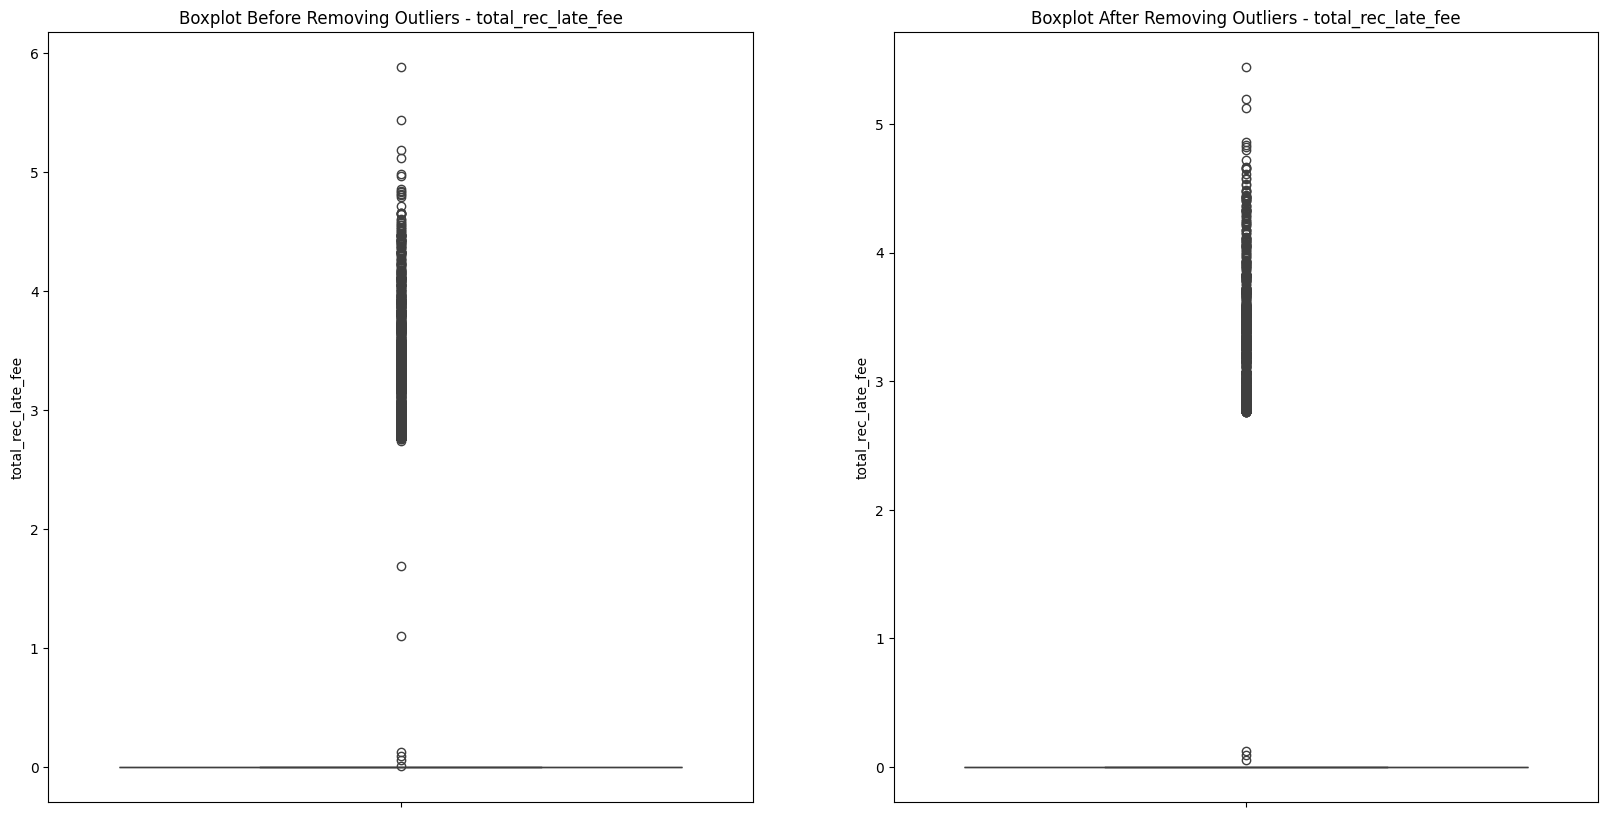

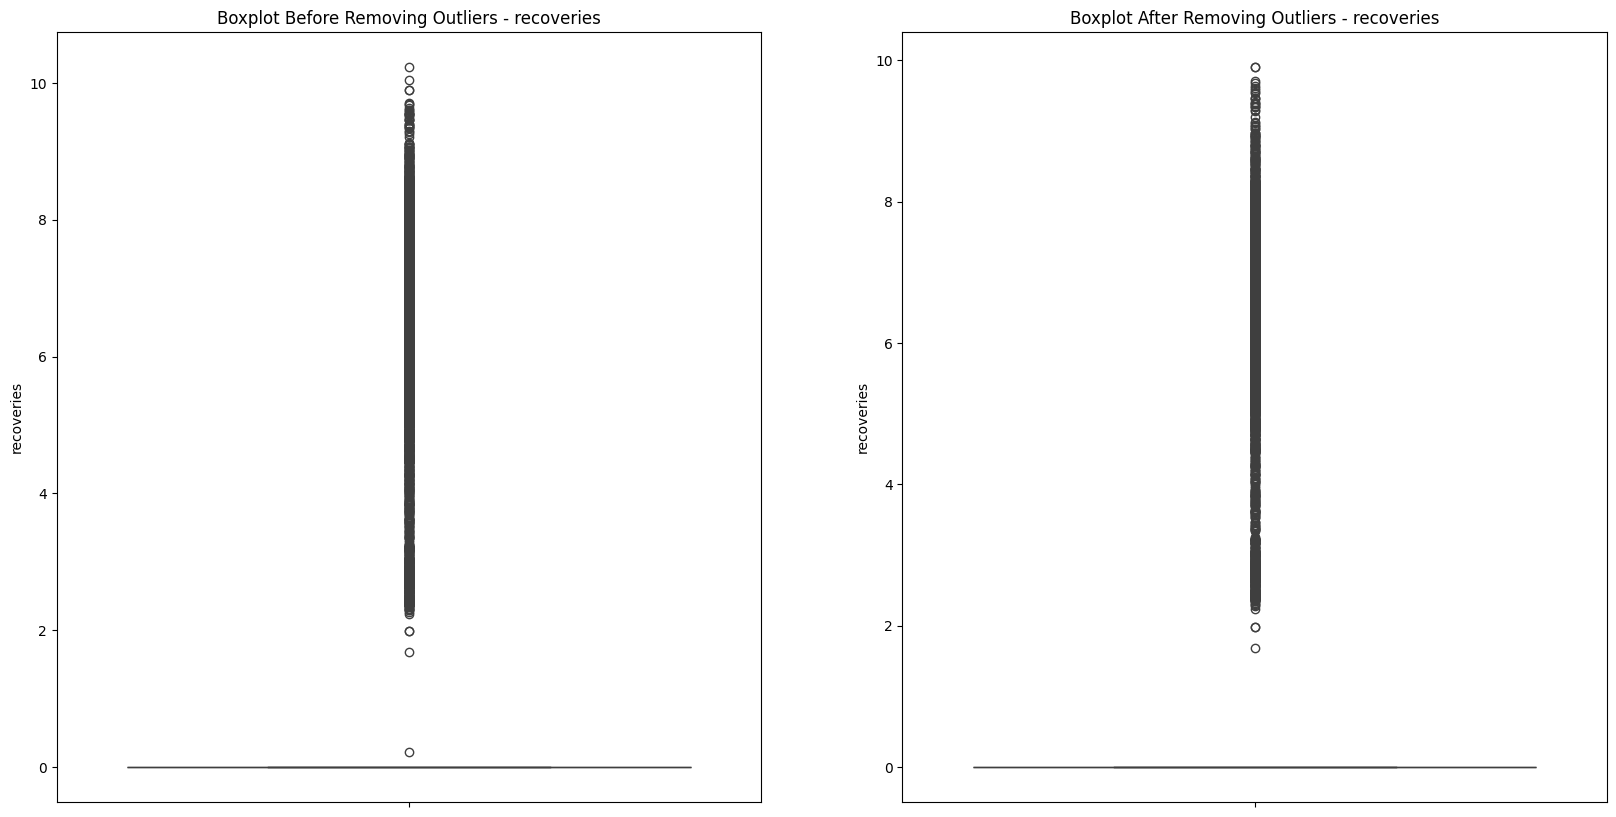

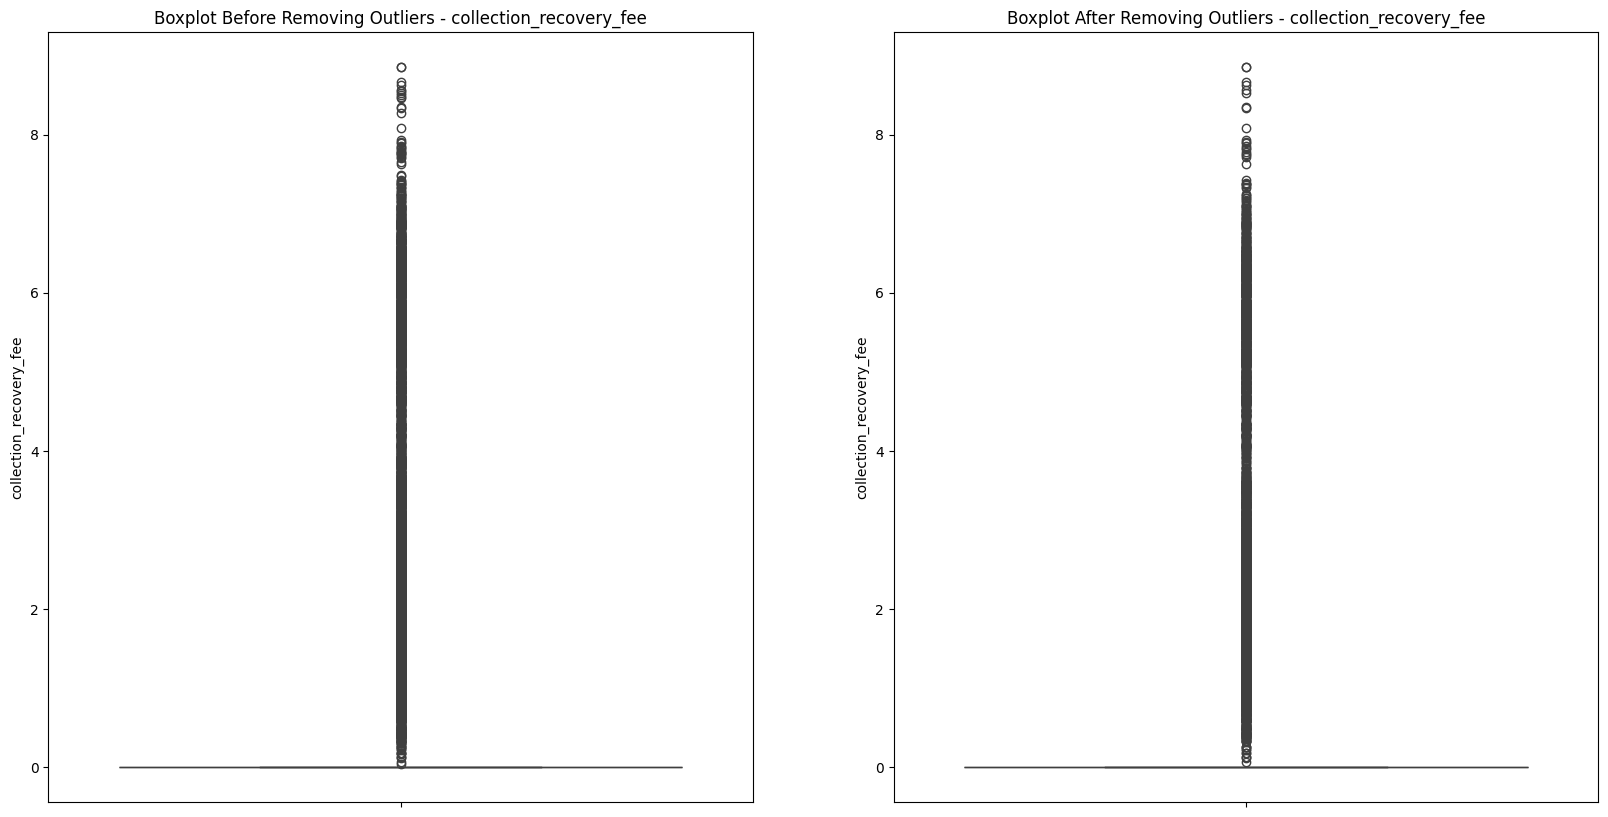

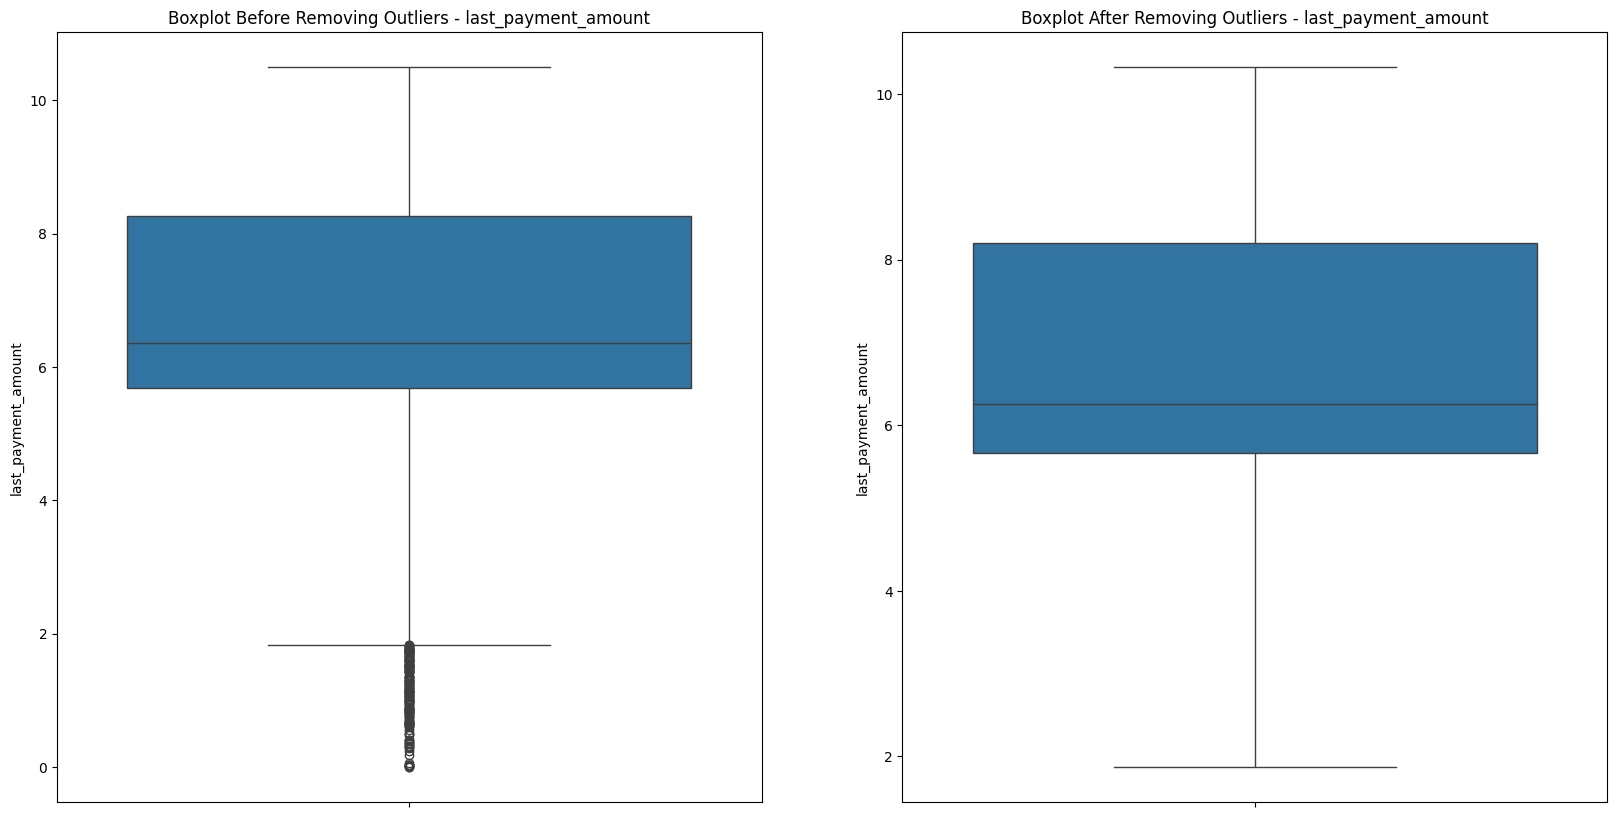

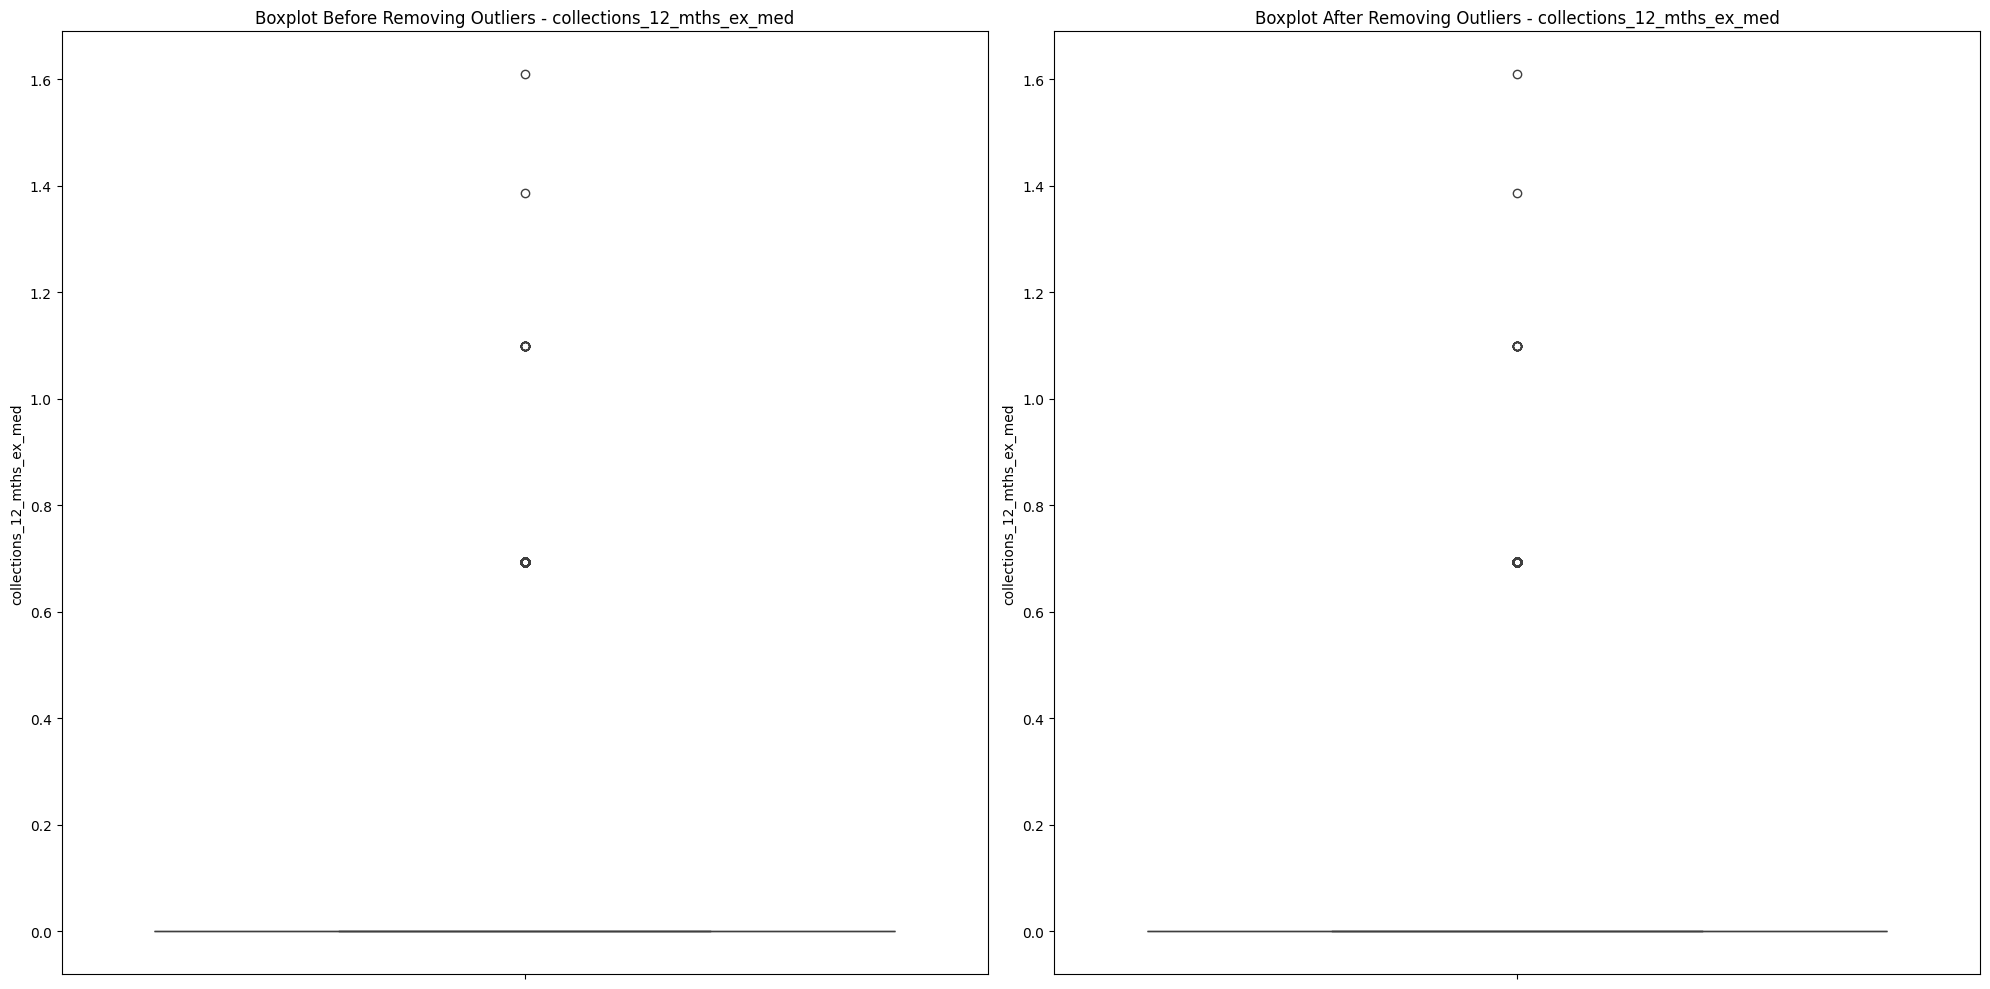

In [25]:
visualize.comparison_of_data(transformed_df,cleaned_df,numerical_columns)

### Task 6 - Drop overly correlated columns:

In [26]:
print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44139 entries, 0 to 54221
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          44139 non-null  int64         
 1   member_id                   44139 non-null  int64         
 2   loan_amount                 44139 non-null  int64         
 3   funded_amount               44139 non-null  float64       
 4   funded_amount_inv           44139 non-null  float64       
 5   term                        44139 non-null  object        
 6   int_rate                    44139 non-null  float64       
 7   instalment                  44139 non-null  float64       
 8   grade                       44139 non-null  category      
 9   sub_grade                   44139 non-null  object        
 10  employment_length           44139 non-null  object        
 11  home_ownership              44139 non-null  category      


                                  id  member_id  loan_amount  funded_amount  \
id                          1.000000   0.994495     0.112365       0.121012   
member_id                   0.994495   1.000000     0.118657       0.127786   
loan_amount                 0.112365   0.118657     1.000000       0.964230   
funded_amount               0.121012   0.127786     0.964230       1.000000   
funded_amount_inv           0.150298   0.158582     0.969012       0.950618   
int_rate                    0.042906   0.046514     0.118149       0.116968   
instalment                  0.117762   0.124694     0.933359       0.917330   
annual_inc                  0.050037   0.052309     0.416971       0.405055   
dti                         0.189347   0.191623     0.097825       0.098019   
delinq_2yrs                 0.065246   0.065808    -0.004027      -0.001152   
inq_last_6mths             -0.068490  -0.071055    -0.046511      -0.047726   
open_accounts               0.142122   0.143960     

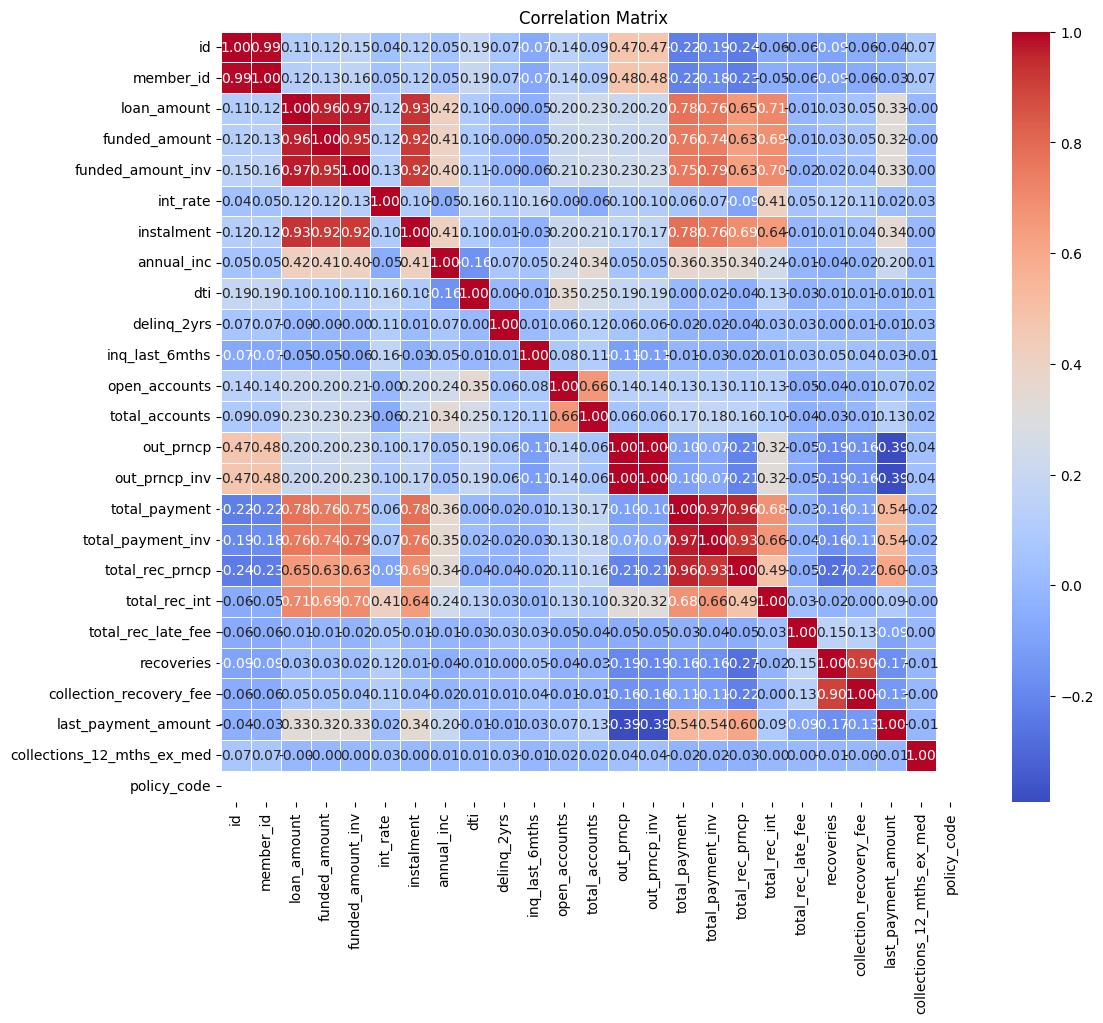

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Compute the correlation matrix
correlation_matrix = cleaned_df[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # Set figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the heatmap
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Identify pairs of highly correlated features
threshold = 0.9
correlation_matrix = cleaned_df[numerical_columns].corr()

# Find the pairs of features with correlation greater than the threshold
highly_correlated = []

# Iterate over the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.append((colname, correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the highly correlated pairs
for pair in highly_correlated:
    print(f"Features: {pair[0]} and {pair[1]} have correlation of {pair[2]:.2f}")

Features: member_id and id have correlation of 0.99
Features: funded_amount and loan_amount have correlation of 0.96
Features: funded_amount_inv and loan_amount have correlation of 0.97
Features: funded_amount_inv and funded_amount have correlation of 0.95
Features: instalment and loan_amount have correlation of 0.93
Features: instalment and funded_amount have correlation of 0.92
Features: instalment and funded_amount_inv have correlation of 0.92
Features: out_prncp_inv and out_prncp have correlation of 1.00
Features: total_payment_inv and total_payment have correlation of 0.97
Features: total_rec_prncp and total_payment have correlation of 0.96
Features: total_rec_prncp and total_payment_inv have correlation of 0.93
Features: collection_recovery_fee and recoveries have correlation of 0.90


#### Info on what I've dropped:

From these results we can see: 

**Member_id & id** are unique identifiers and shouldn't both be included in the model. I am dropping id and keep member_id. Member_id may be more useful as it is linked to customer behaviour.

> Drop id -- `cleaned_df = cleaned_df.drop(columns=['id'])`

**Funded_amount & loan_amount** 
Using linear regression we can see that the relationship between loan_amount & funded_amount shows a good fit (with a R-squared of 0.93) and with the high correlation of 0.96 we can drop funded_amount and keep loan_amount. 

> Drop funded_amount --  `cleaned_df = cleaned_df.drop(columns=['funded_amount'])

**loan_amount & funded_amount_inv**
Given the high correlation and the near-perfect inverse relationship between funded_amount_inv and loan_amount, you can confidently drop funded_amount_inv from the dataset, as it is a derived feature and won't provide any additional insights or value.

> Drop funded_amount_inv --  `cleaned_df = cleaned_df.drop(columns=['funded_amount_inv'])`

**Instalment & loan_amount**
Since I have already dropped funded_amount & funded_amount_inv then it seems logical to remove instalment.

> Drop instalment --  `cleaned_df = cleaned_df.drop(columns=['instalment'])`

**out_prncp_inv and out_prncp have correlation of 1.00 = identical** so only keeping out_prncp

> Drop out_prncp_inv --  `cleaned_df = cleaned_df.drop(columns=['out_prncp_inv'])`



####

In [32]:
columns_to_drop = ['funded_amount', 'funded_amount_inv', 'id', 'installment', 'out_prncp_inv']
cleaned = DataFrameTransform(cleaned_df)
cleaned_df = cleaned.drop_columns(cleaned_df, columns_to_drop)

cleaned_df.info()

Dropped columns: ['funded_amount', 'funded_amount_inv', 'id', 'installment', 'out_prncp_inv']
<class 'pandas.core.frame.DataFrame'>
Index: 44139 entries, 0 to 54221
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   member_id                   44139 non-null  int64         
 1   loan_amount                 44139 non-null  int64         
 2   term                        44139 non-null  object        
 3   int_rate                    44139 non-null  float64       
 4   instalment                  44139 non-null  float64       
 5   grade                       44139 non-null  category      
 6   sub_grade                   44139 non-null  object        
 7   employment_length           44139 non-null  object        
 8   home_ownership              44139 non-null  category      
 9   annual_inc                  44139 non-null  float64       
 10  verification_status         4

In [33]:
cleaned_df.to_csv('C:/Users/torig/Project_2/Customer_loans_in_finance/cleaned_dataframe.csv', index=False)